In [ ]:
import subprocess
import sys

# Lista de paquetes necesarios para la ejecución del código
paquetes = [
    ("pandas", "pandas"),
    ("numpy", "numpy"),
    ("matplotlib", "matplotlib"),
    ("seaborn", "seaborn"),
    ("scikit-learn", "sklearn"),  # Se instala "scikit-learn", pero se verifica "sklearn"
    ("scipy", "scipy"),
    ("statsmodels", "statsmodels")
]

for paquete, modulo in paquetes:
    try:
        __import__(modulo)  # Importa el módulo
    except ImportError:
        print(f"{paquete} no está instalado. La instalación está en curso.")
        subprocess.check_call([sys.executable, "-m", "pip", "install", paquete])
    else:
        print(f"{paquete} ya está instalado.")



pandas ya está instalado.
numpy ya está instalado.
matplotlib ya está instalado.
seaborn ya está instalado.
scikit-learn ya está instalado.
scipy ya está instalado.
statsmodels ya está instalado.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.covariance import MinCovDet
from scipy.spatial.distance import mahalanobis
from scipy.stats import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

#!pip install pandas openpyxl

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/dxnxlsxn/Proyectos/refs/heads/main/Hipertension_Arterial_Mexico.csv")
#df=df[df["edad"]>14]
df['diabetes'] = df['valor_hemoglobina_glucosilada'].apply(lambda x: 1 if x >= 6.5 else 0)
df['diabetes_no_controlada'] = df['valor_hemoglobina_glucosilada'].apply(lambda x: 1 if x >= 8 else 0)
df.reset_index(drop=True,inplace=True)

#Se copia el link del archivo crudo y no el permalink que corresponde a GitHub's web viewer for repository contents, por lo que los datos descargados serían una página web, y no la CSV file como tal.
df.head()

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension,diabetes,diabetes_no_controlada
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,48.5,33.5,0.0,107,4,32.889389,120,1,0,0
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,44.5,41.1,113.7,104,2,1.000000,240,0,0,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,42.3,37.8,103.7,105,1,1.000000,480,0,0,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,48.5,33.5,0.0,117,5,26.265339,275,1,0,0
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,49.6,42.0,118.9,123,2,1.000000,255,0,1,0


In [ ]:
# Función para evaluar el síndrome metabólico
def evaluar_riesgo(fila):
    factores_riesgo = 0

    # Cintura grande
    if (fila['sexo'] == 2 and fila['medida_cintura'] >= 88.9) or \
       (fila['sexo'] == 1 and fila['medida_cintura'] >= 101.6):
        factores_riesgo += 1

    # Triglicéridos altos
    if fila['valor_trigliceridos'] >= 150:
        factores_riesgo += 1

    # Colesterol HDL bajo
    if (fila['sexo'] == 2 and fila['valor_colesterol_hdl'] < 50) or \
       (fila['sexo'] == 1 and fila['valor_colesterol_hdl'] < 40):
        factores_riesgo += 1

    # Presión arterial alta (sistólica >= 130)
    if fila['tension_arterial'] >= 130:
        factores_riesgo += 1

    # Glucosa alta en ayunas
    if fila['resultado_glucosa'] >= 100:
        factores_riesgo += 1

    # Diagnóstico de síndrome metabólico (al menos 3 factores)
    return 1 if factores_riesgo >= 3 else 0

# Agregar columna para diagnóstico
df['sindrome_metabolico'] = df.apply(evaluar_riesgo, axis=1)

In [ ]:
dfo=pd.read_csv("https://raw.githubusercontent.com/dxnxlsxn/Proyectos/refs/heads/main/Determinaciones_bioqu%C3%ADmicas_cronicas_deficiencias_9feb23.csv",sep=";")
#Se copia el link del archivo crudo y no el permalink que corresponde a GitHub's web viewer for repository contents, por lo que los datos descargados serían una página web, y no la CSV file como tal.
dfo.head()

,FOLIO_INT,FOLIO_I,t_hora,t_min,t_sumai,t_sumaf,hora_ini_1,fecha_ini_1,hora_fin_1,fecha_fin_1,...,valor_VIT_D,fecdeterm_VIT_D,ponde_v,cuenta_mic,ponde_m12a49,ponde_m0a11,estrato,region,est_sel,upm
0,2022_01001004_01,2022_01001004,13,35,813,815,13:33:14,10/11/2022,13:35:20,10/11/2022,...,,,,0,,,3,4,13,0100100011320
1,2022_01001008_01,2022_01001008,20,44,1244,1244,20:34:12,20/11/2022,20:34:55,20/11/2022,...,,,,0,,,3,4,13,0100100011320
2,2022_01001008_03,2022_01001008,20,43,1243,1243,20:41:51,20/11/2022,20:42:23,20/11/2022,...,,,,0,,,3,4,13,0100100011320
3,2022_01001009_02,2022_01001009,9,26,561,566,09:21:48,10/11/2022,09:26:03,10/11/2022,...,,,"16452,5523392573",0,,,3,4,13,0100100011320
4,2022_01001011_01,2022_01001011,20,49,1249,1249,20:45:31,20/11/2022,20:46:06,20/11/2022,...,,,,0,,,3,4,13,0100100011320


In [ ]:
#dfo[["FOLIO_I","entidad"]]
df_entidad = dfo[["FOLIO_I","entidad"]].drop_duplicates(subset='FOLIO_I', keep='first')
df_entidad.reset_index(drop=True,inplace=True)
df = pd.merge(df, df_entidad, on='FOLIO_I', how='left')

In [ ]:
regiones = {
    "norte": [2, 3, 6, 7, 8, 10, 19, 26, 27, 28, 32],
    "centro": [1, 4, 5, 9, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25],
    "sur": [20, 23, 29, 30, 31]
}

# Función para asignar valores de las columnas "sur", "centro" y "norte"
def asignar_region(estado):
    # Inicializar las columnas
    sur = 1 if estado in regiones["sur"] else 0
    centro = 1 if estado in regiones["centro"] else 0
    norte = 1 if estado in regiones["norte"] else 0

    return pd.Series([sur, centro, norte], index=["sur", "centro", "norte"])

# Aplicar la función a cada fila de la columna 'Entidad' del DataFrame df
df[['sur', 'centro', 'norte']] = df['entidad'].apply(asignar_region)

In [ ]:
df.drop(["distancia_rodilla_talon","circunferencia_de_la_pantorrilla"],axis=1,inplace=True)

# **Análisis exploratorio de los datos**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4363 entries, 0 to 4362
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FOLIO_I                        4363 non-null   object 
 1   sexo                           4363 non-null   int64  
 2   edad                           4363 non-null   int64  
 3   concentracion_hemoglobina      4363 non-null   float64
 4   temperatura_ambiente           4363 non-null   int64  
 5   valor_acido_urico              4363 non-null   float64
 6   valor_albumina                 4363 non-null   float64
 7   valor_colesterol_hdl           4363 non-null   int64  
 8   valor_colesterol_ldl           4363 non-null   float64
 9   valor_colesterol_total         4363 non-null   int64  
 10  valor_creatina                 4363 non-null   float64
 11  resultado_glucosa              4363 non-null   float64
 12  valor_insulina                 4363 non-null   f

In [ ]:
#Hombres y mujeres presentes en la muestra
Nro_h=df[df["sexo"]==1]["sexo"].count()
Porcentaje_h=df[df["sexo"]==1]["sexo"].count()/df["sexo"].count()*100
Nro_m=df[df["sexo"]==2]["sexo"].count()
Porcentaje_m=df[df["sexo"]==2]["sexo"].count()/df["sexo"].count()*100
print(f"La muestra se encuentra conformada por {Nro_h} hombres y {Nro_m} mujeres, representando un {Porcentaje_h.round(1)}% y {Porcentaje_m.round(1)}% respectivamente.")
#Número de personas con riesgo de hipertensión en la muestra
Nro_hipertensos=df[df["riesgo_hipertension"]==1]["riesgo_hipertension"].count()
Porcentaje_hipertensos=df[df["riesgo_hipertension"]==1]["riesgo_hipertension"].count()/df["riesgo_hipertension"].count()*100
print(f"Dentro de la muestra se encuentran {Nro_hipertensos} personas con riesgo de hipertensión las cuales conforman el {Porcentaje_hipertensos.round(1)}% del total.")

Nro_diabetes=df[df["diabetes"]==1]["diabetes"].count()
Nro_diabetesn=df[df["diabetes_no_controlada"]==1]["diabetes_no_controlada"].count()
Nro_sindrome=df[df["sindrome_metabolico"]==1]["sindrome_metabolico"].count()
Nro_norte=df[df["norte"]==1]["norte"].count()
Nro_centro=df[df["centro"]==1]["centro"].count()
Nro_sur=df[df["sur"]==1]["sur"].count()
#Estadísticas excluyendo la columna de sexo y riesgo de hipertensión
df_estadisticas=df.describe().copy()
df_estadisticas.drop(["sexo","riesgo_hipertension","diabetes","diabetes_no_controlada","sindrome_metabolico","entidad","sur","centro","norte"],axis=1,inplace=True)
df_estadisticas

La muestra se encuentra conformada por 1687 hombres y 2676 mujeres, representando un 38.7% y 61.3% respectivamente.
Dentro de la muestra se encuentran 2816 personas con riesgo de hipertensión las cuales conforman el 64.5% del total.


,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,resultado_glucosa,...,peso,estatura,medida_cintura,segundamedicion_peso,segundamedicion_estatura,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total
count,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,...,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000,4363.000000
mean,47.315609,14.228581,21.385973,4.787302,3.868966,36.030254,87.809489,144.138895,0.614573,96.894660,...,58.291089,156.165437,68.425556,65.789817,153.819940,19.986340,123.732065,3.239972,22.451292,481.815265
std,14.445572,1.149723,3.165974,0.820317,0.450879,8.082762,17.530104,28.228483,0.200610,45.586604,...,33.212053,14.705331,46.557602,7.447041,7.854184,40.442427,22.608401,2.778287,12.314372,673.702857
min,4.000000,5.500000,2.000000,0.200000,1.000000,9.000000,11.100000,40.000000,0.060000,10.400000,...,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
25%,36.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,92.000000,...,49.300000,151.000000,0.000000,64.700000,154.000000,0.000000,111.000000,2.000000,19.619493,240.000000
50%,48.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,92.000000,...,67.600000,154.500000,90.100000,64.700000,154.000000,0.000000,121.000000,3.000000,26.229298,380.000000
75%,58.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,92.000000,...,79.600000,162.900000,101.600000,64.700000,154.000000,0.000000,136.000000,4.000000,30.285913,585.000000
max,93.000000,19.900000,35.000000,11.000000,5.300000,279.000000,303.000000,681.000000,8.270000,2372.000000,...,168.800000,192.000000,189.300000,151.200000,182.600000,165.000000,200.000000,99.000000,60.513476,17820.000000


In [ ]:
#df.describe().to_csv('EBG.csv')
#df_estadisticas.to_csv('EBH.csv')

## **Apartado gráfico**

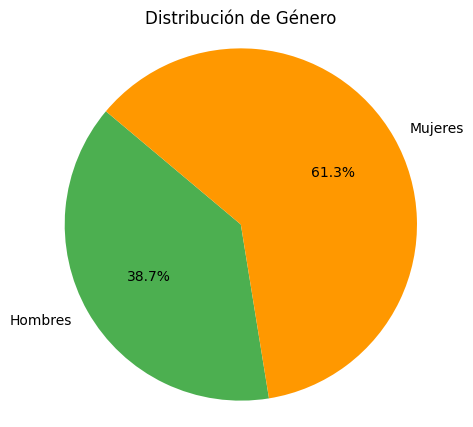

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie([Nro_h,Nro_m], labels=['Hombres', 'Mujeres'], colors=['#4CAF50', '#FF9800'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Género')
plt.axis('equal')  # Para que el pastel se vea circular
plt.show()

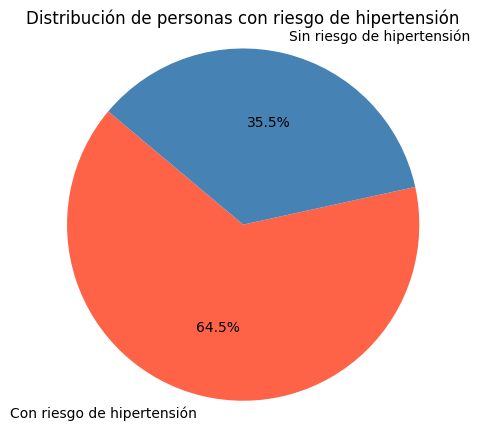

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie([Nro_hipertensos,df["riesgo_hipertension"].count()-Nro_hipertensos], labels=['Con riesgo de hipertensión', 'Sin riesgo de hipertensión'], colors=['#FF6347', '#4682B4'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de personas con riesgo de hipertensión')
plt.axis('equal')  # Para que el pastel se vea circular
plt.show()

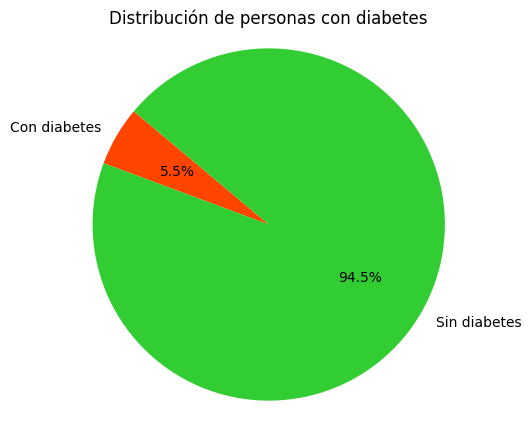

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie([Nro_diabetes,df["diabetes"].count()-Nro_diabetes], labels=['Con diabetes', 'Sin diabetes'], colors=['#FF4500', '#32CD32'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de personas con diabetes')
plt.axis('equal')  # Para que el pastel se vea circular
plt.show()

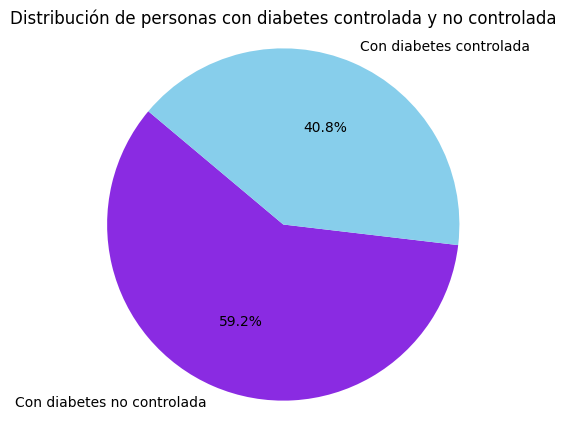

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie([Nro_diabetesn,Nro_diabetes-Nro_diabetesn], labels=['Con diabetes no controlada', 'Con diabetes controlada'], colors=['#8A2BE2', '#87CEEB'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de personas con diabetes controlada y no controlada')
plt.axis('equal')  # Para que el pastel se vea circular
plt.show()

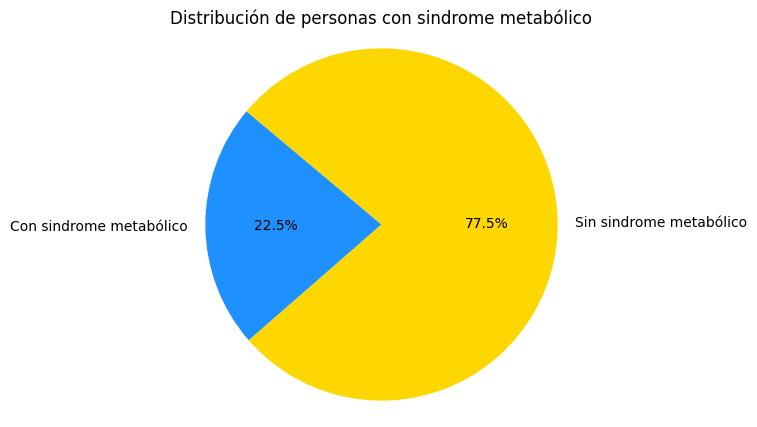

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie([Nro_sindrome,df["sindrome_metabolico"].count()-Nro_sindrome], labels=['Con sindrome metabólico', 'Sin sindrome metabólico'], colors=['#1E90FF', '#FFD700'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de personas con sindrome metabólico')
plt.axis('equal')  # Para que el pastel se vea circular
plt.show()

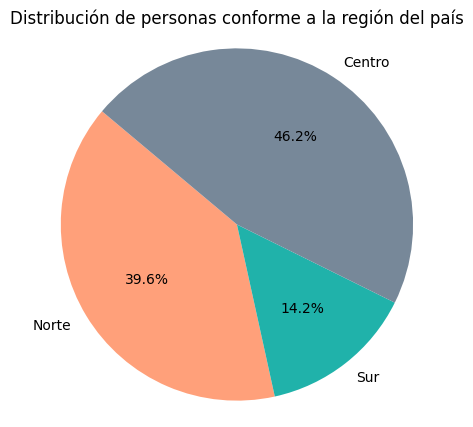

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie([Nro_norte,Nro_sur,Nro_centro], labels=['Norte', 'Sur', 'Centro'], colors=['#FFA07A', '#20B2AA', '#778899'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de personas conforme a la región del país')
plt.axis('equal')  # Para que el pastel se vea circular
plt.show()

In [ ]:
estados_mexico = {
    1: "Aguascalientes",
    2: "Baja California",
    3: "Baja California Sur",
    4: "Campeche",
    5: "Coahuila de Zaragoza",
    6: "Colima",
    7: "Chiapas",
    8: "Chihuahua",
    9: "Ciudad de México",
    10: "Durango",
    11: "Guanajuato",
    12: "Guerrero",
    13: "Hidalgo",
    14: "Jalisco",
    15: "Estado de México",
    16: "Michoacán de Ocampo",
    17: "Morelos",
    18: "Nayarit",
    19: "Nuevo León",
    20: "Oaxaca",
    21: "Puebla",
    22: "Querétaro",
    23: "Quintana Roo",
    24: "San Luis Potosí",
    25: "Sinaloa",
    26: "Sonora",
    27: "Tabasco",
    28: "Tamaulipas",
    29: "Tlaxcala",
    30: "Veracruz de Ignacio de la Llave",
    31: "Yucatán",
    32: "Zacatecas"
}

In [ ]:
df["estado"] = df["entidad"].map(estados_mexico)

<ipython-input-21-5c1e601e68ad>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="estado", palette="viridis")  # Cambia la paleta


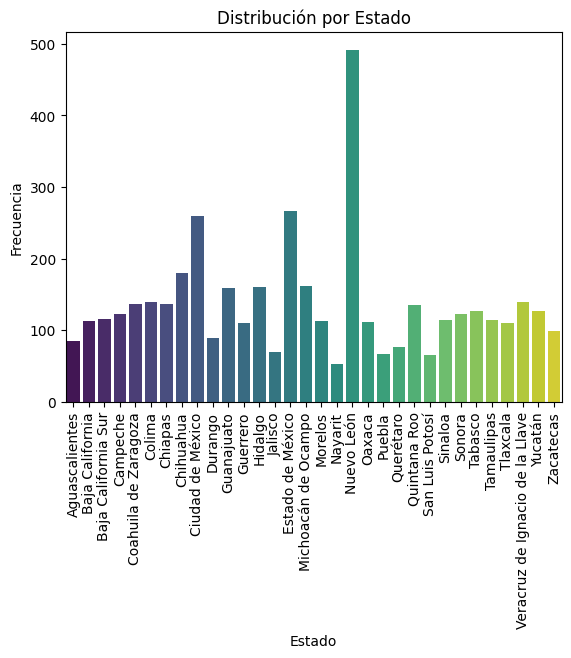

In [ ]:
sns.countplot(data=df, x="estado", palette="viridis")  # Cambia la paleta
plt.title("Distribución por Estado")
plt.xlabel("Estado")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
plt.show()

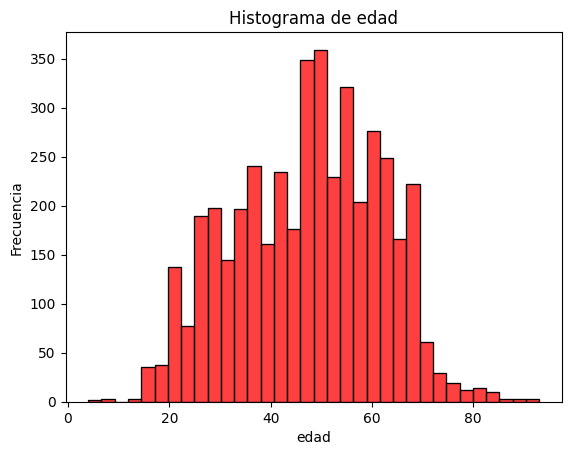

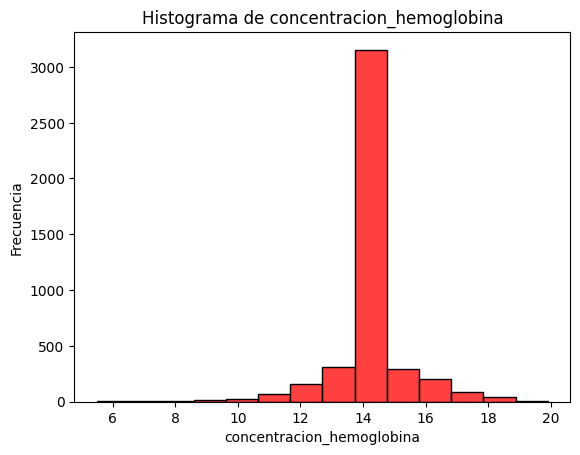

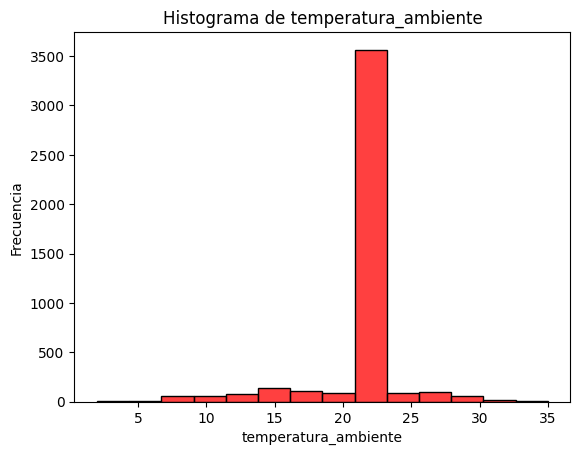

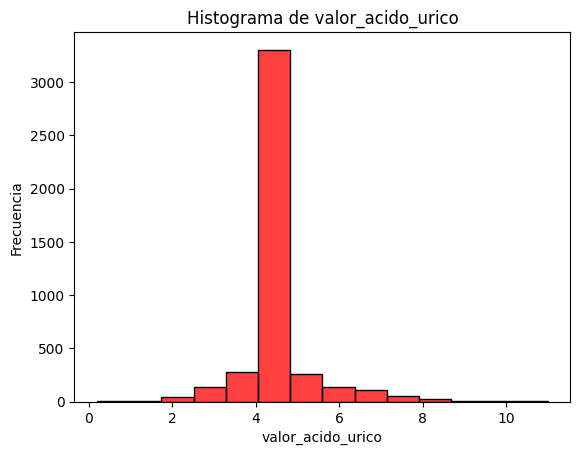

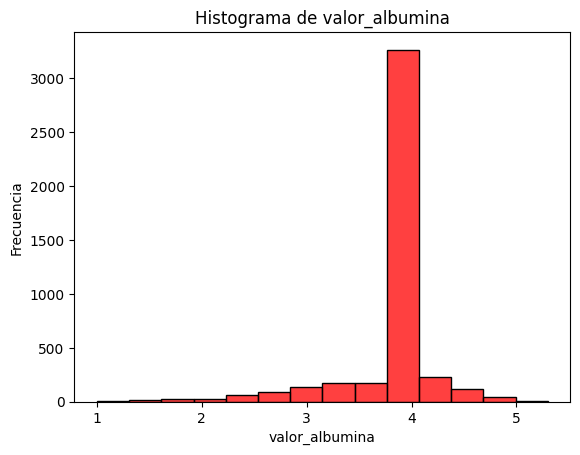

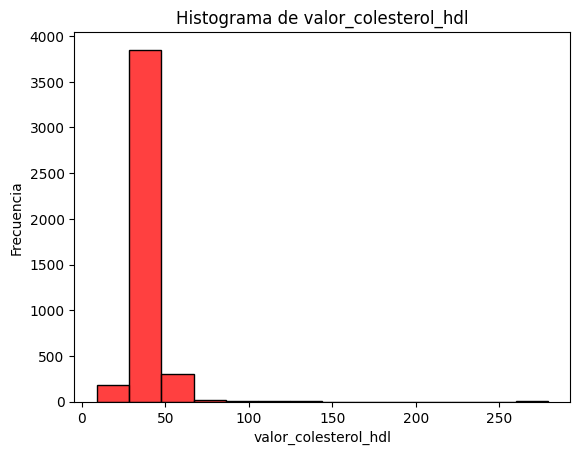

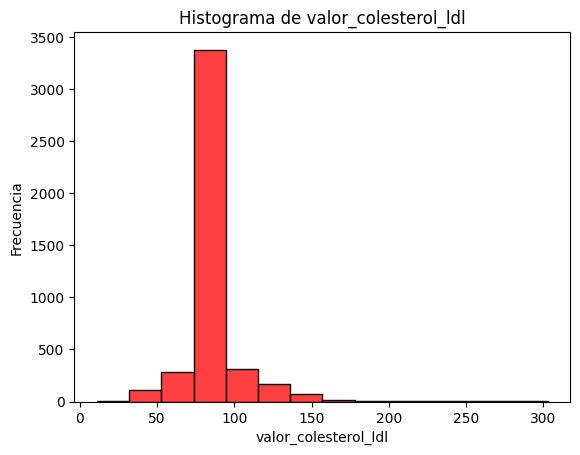

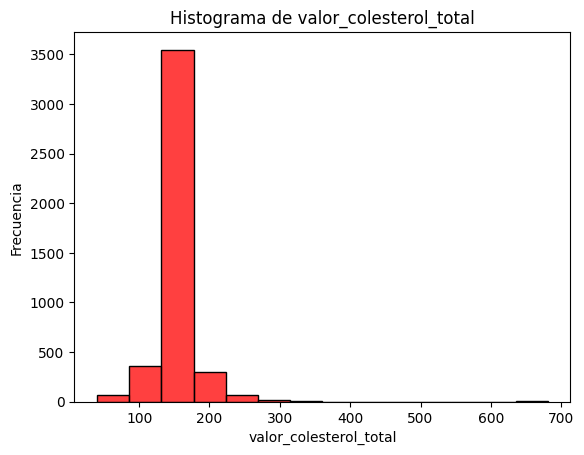

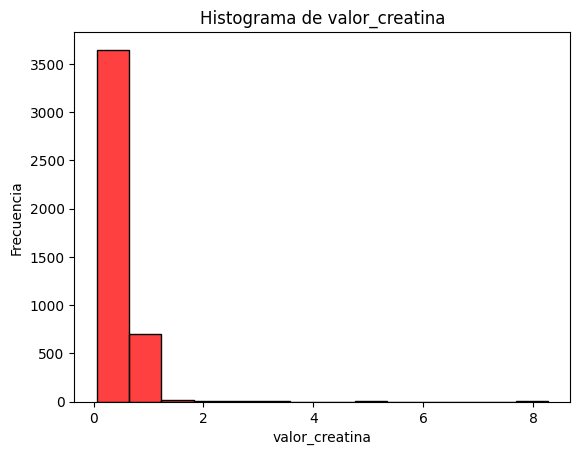

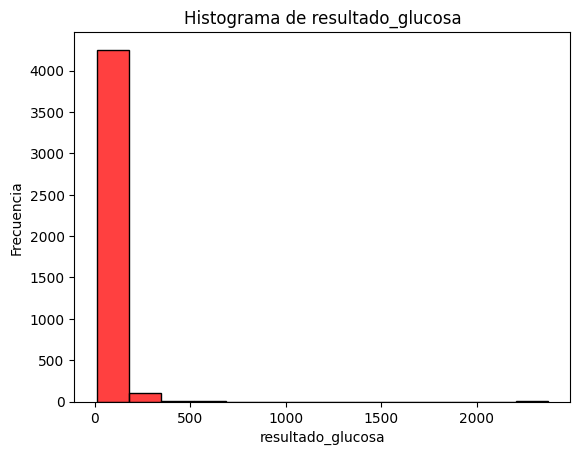

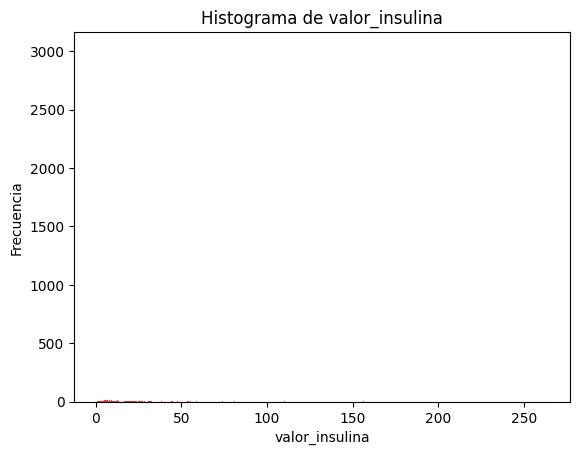

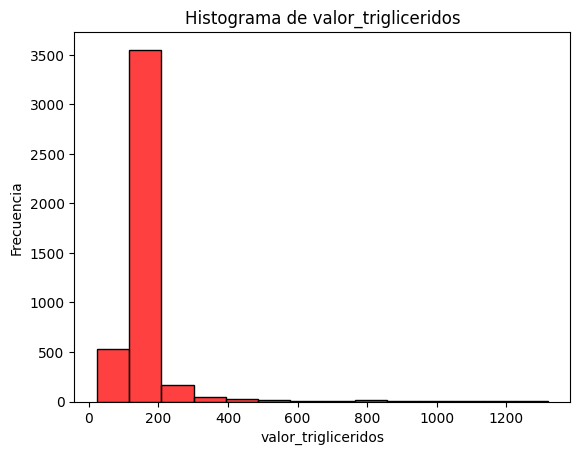

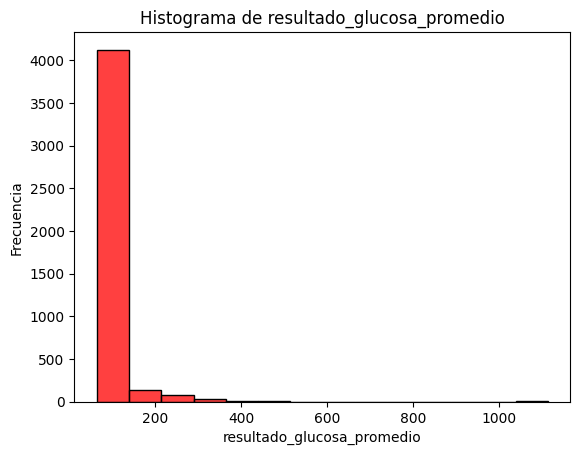

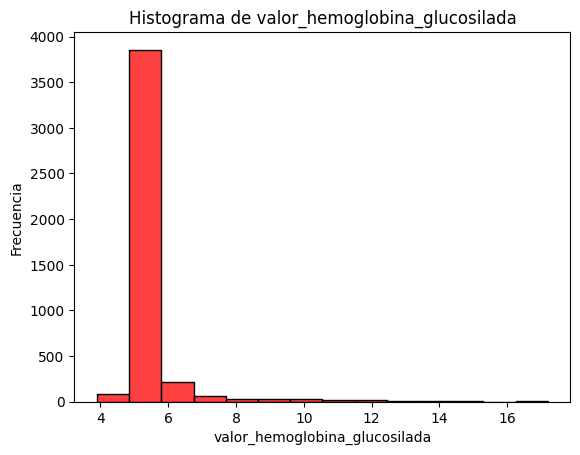

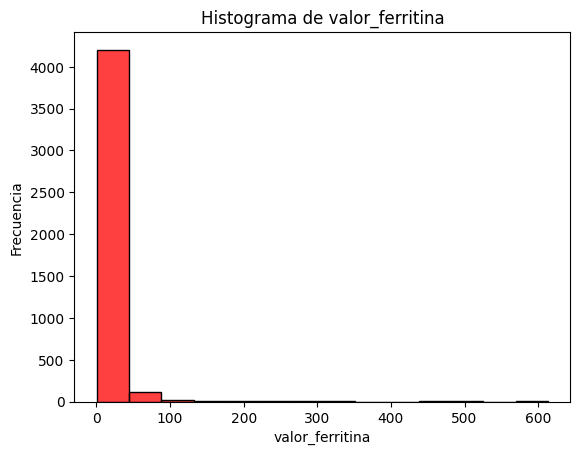

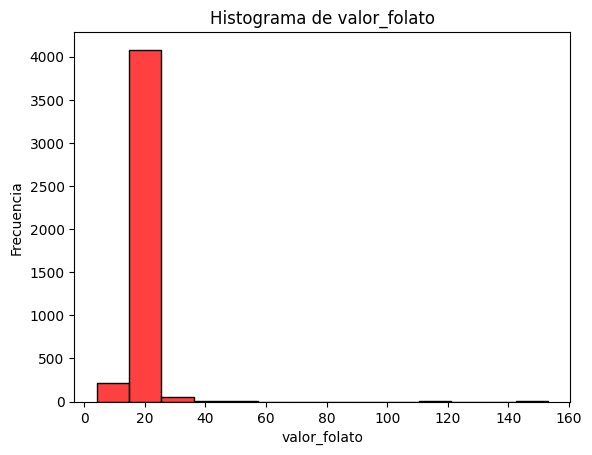

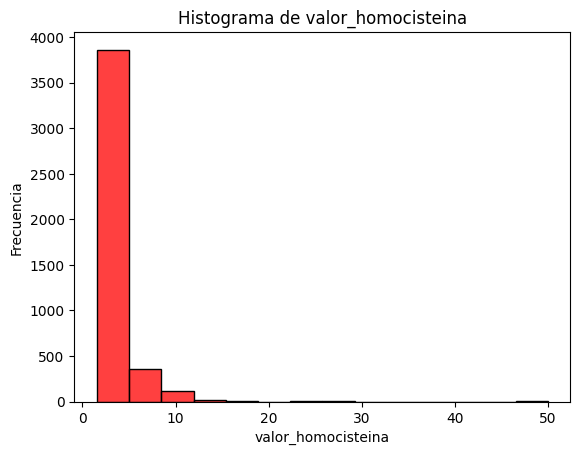

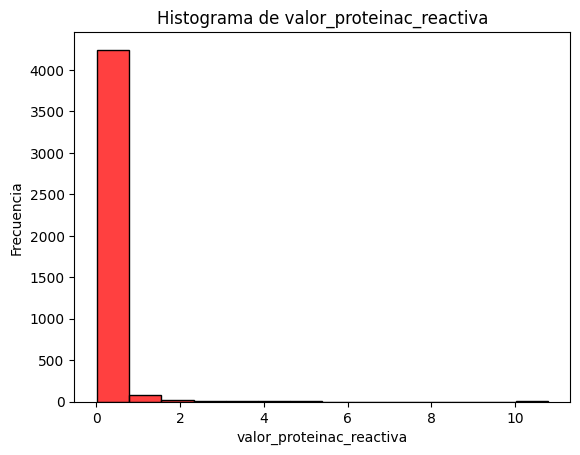

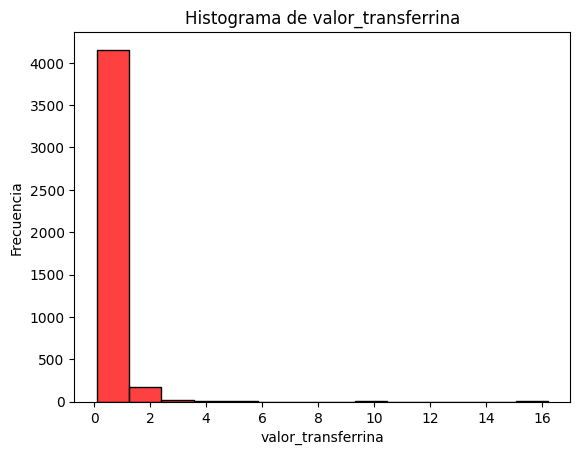

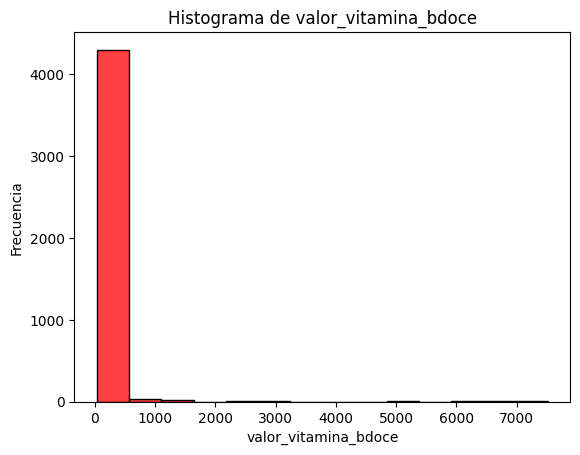

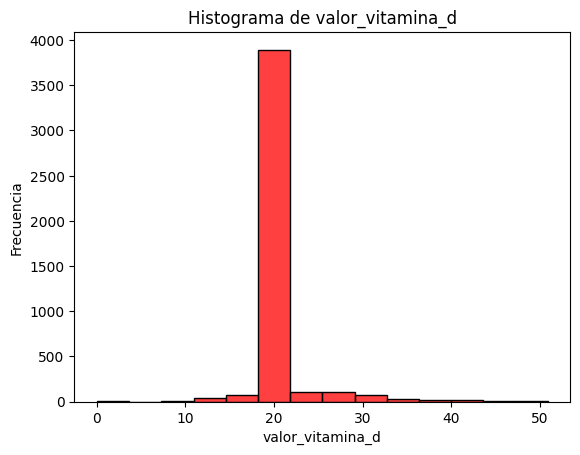

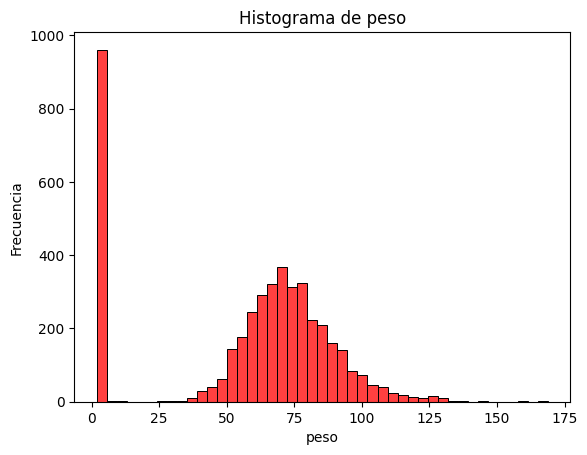

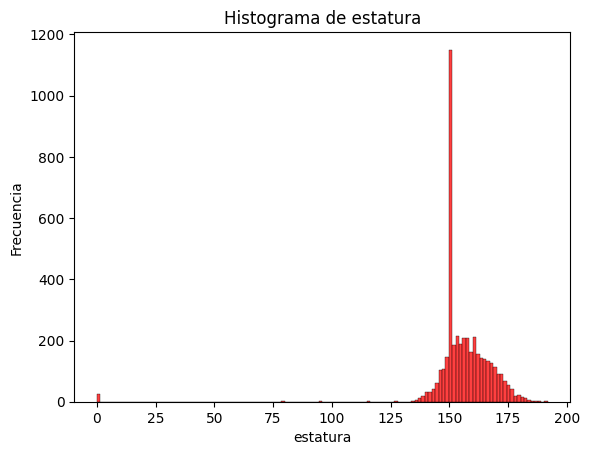

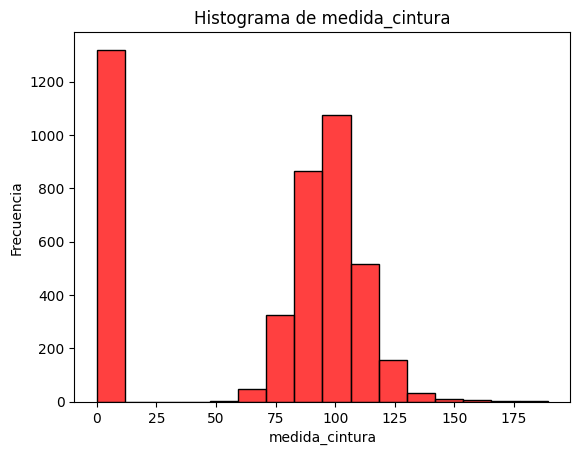

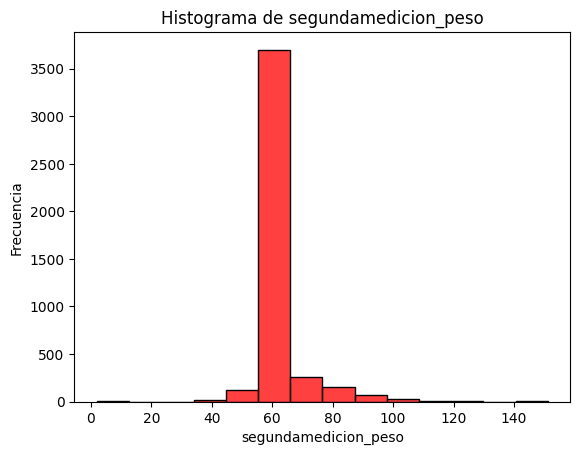

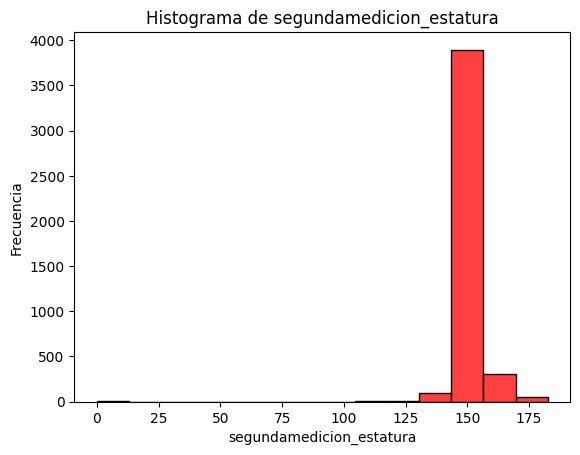

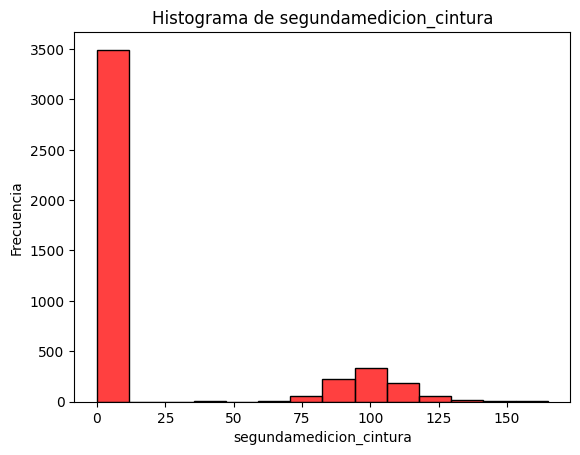

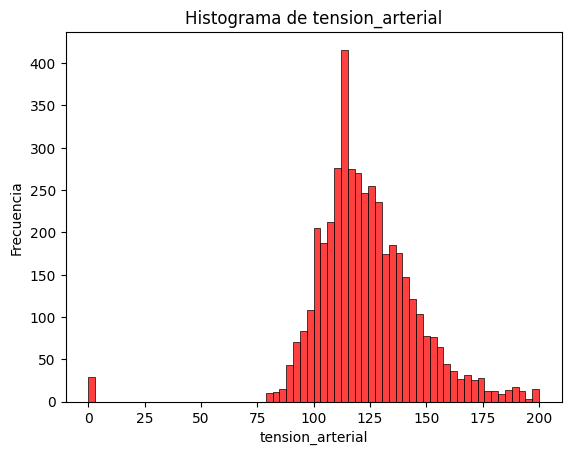

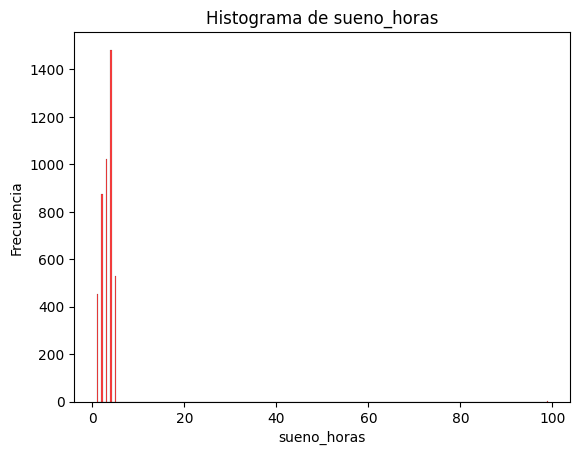

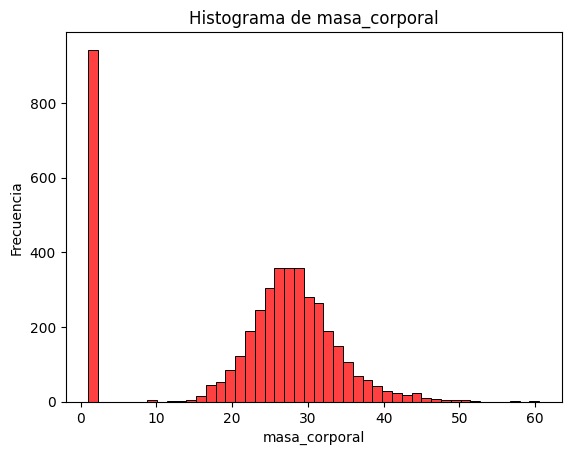

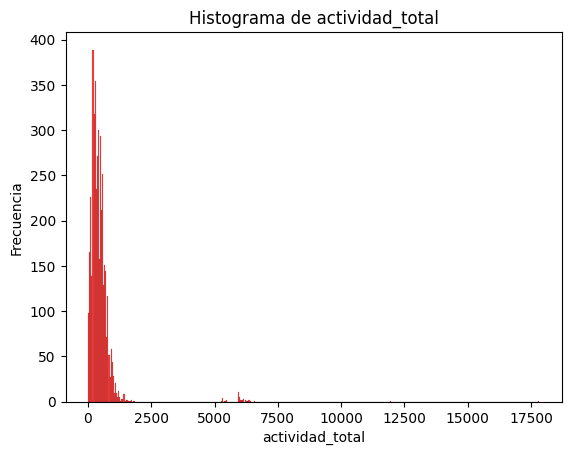

In [ ]:
for i in df.columns:
  if i not in ["FOLIO_I","sexo","riesgo_hipertension","diabetes","diabetes_no_controlada","sindrome_metabolico","entidad","estado","sur","centro","norte"]:
    sns.histplot(df[i],color="#FF0000")
    plt.title(f'Histograma de {i}')
    plt.xlabel(i)
    plt.ylabel('Frecuencia')
    plt.show()



## **Identificación de valores atípicos**

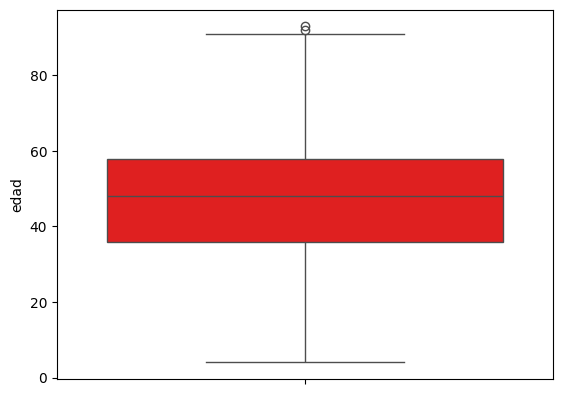

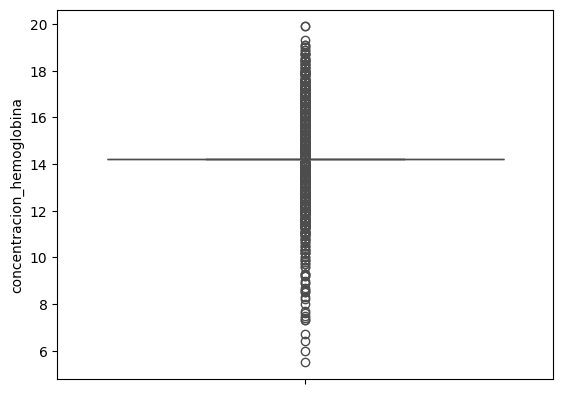

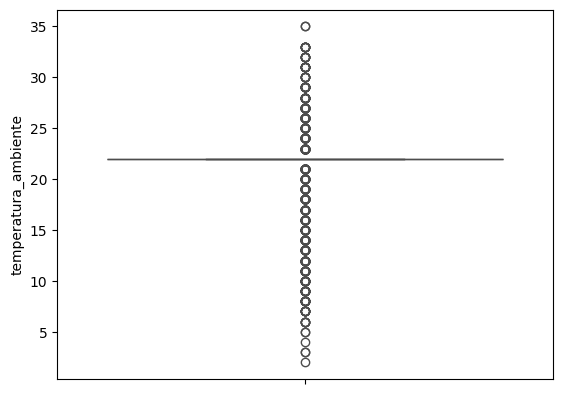

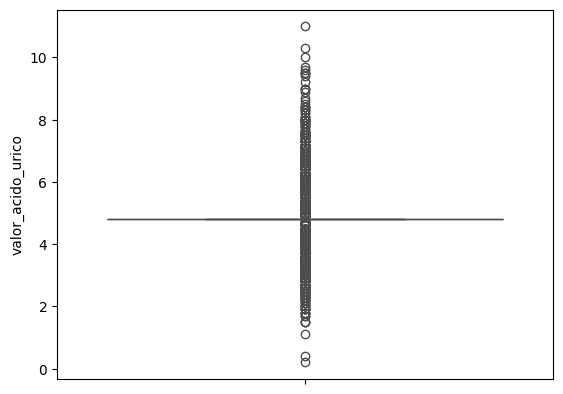

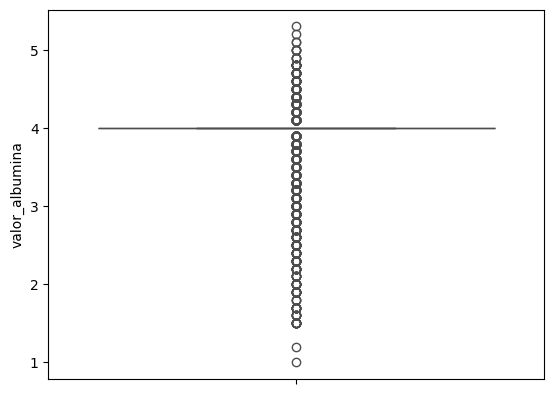

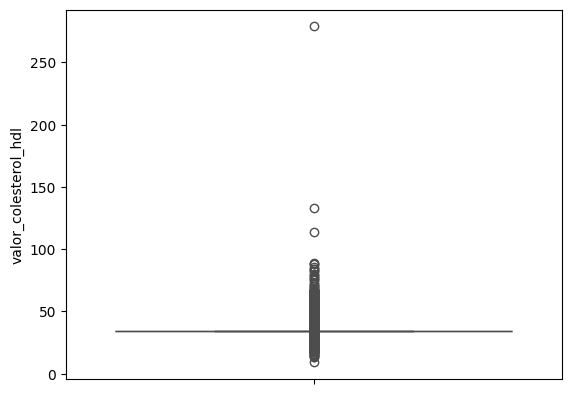

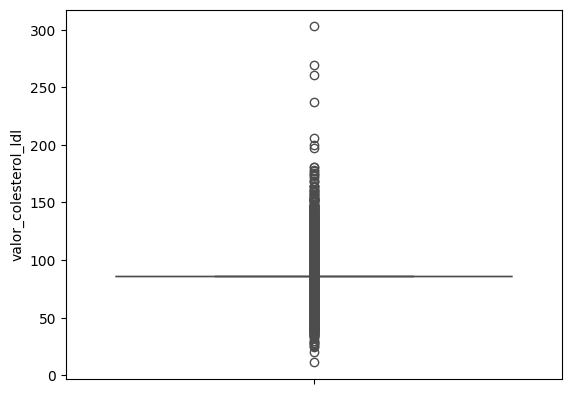

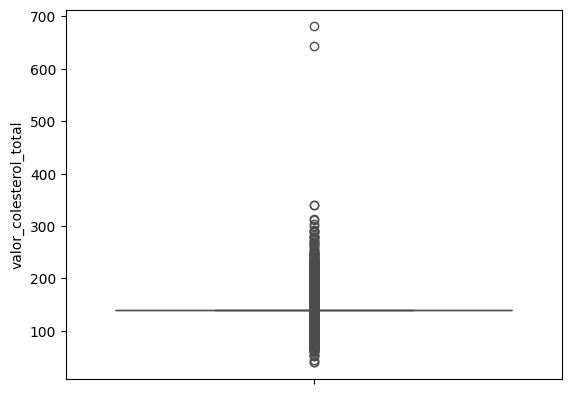

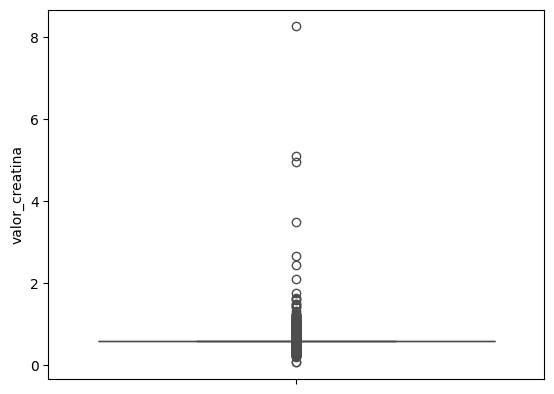

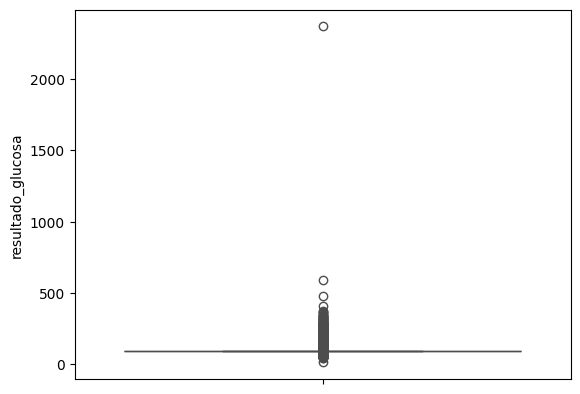

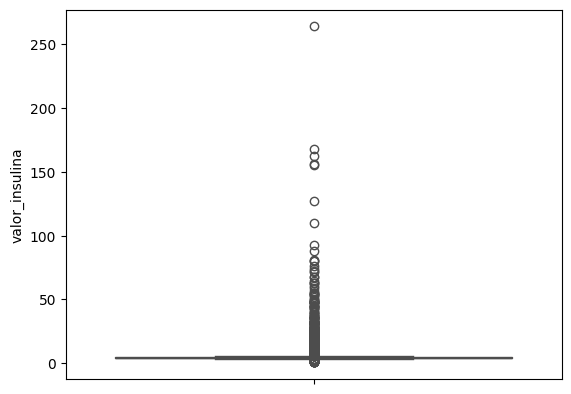

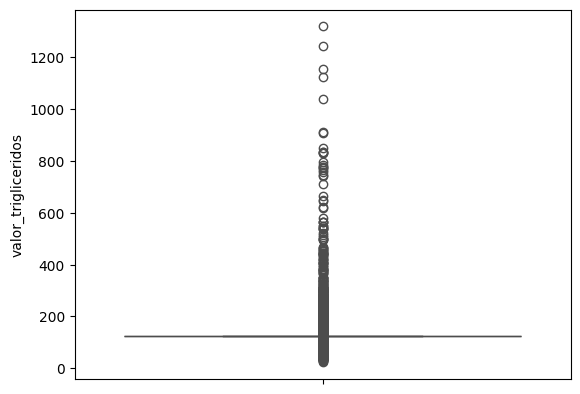

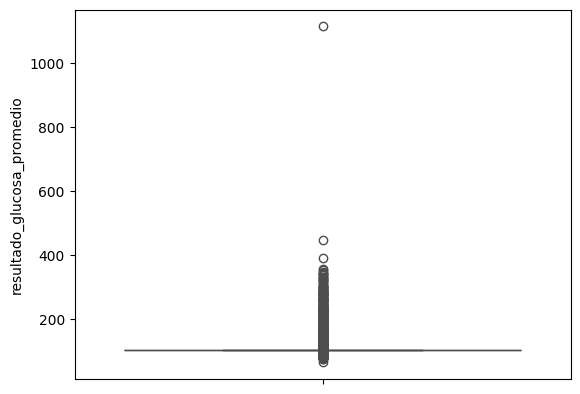

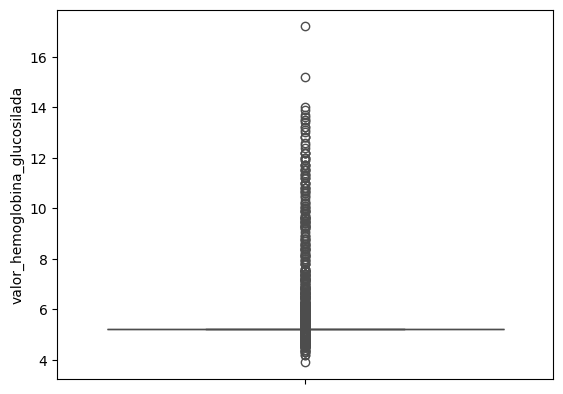

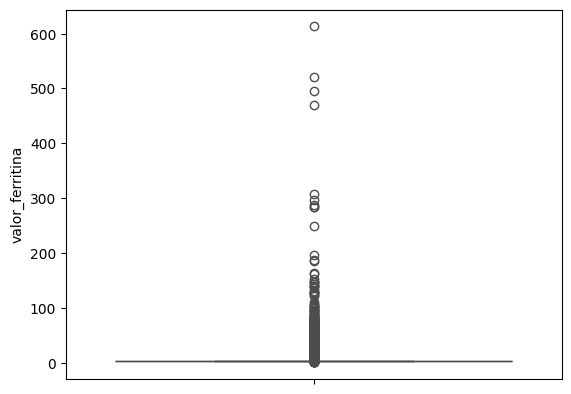

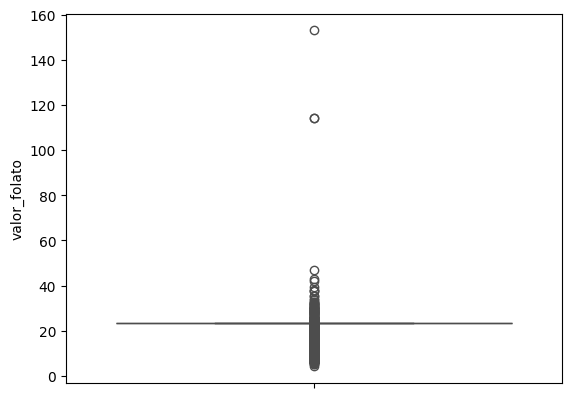

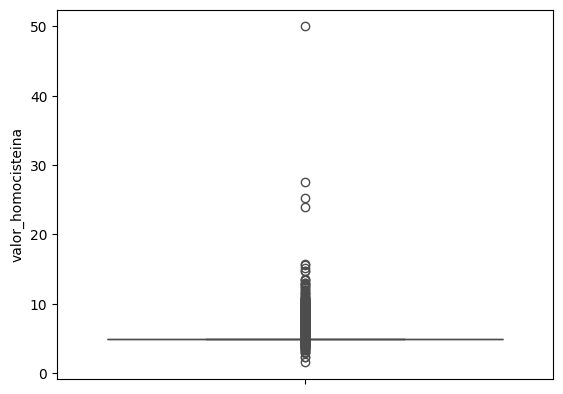

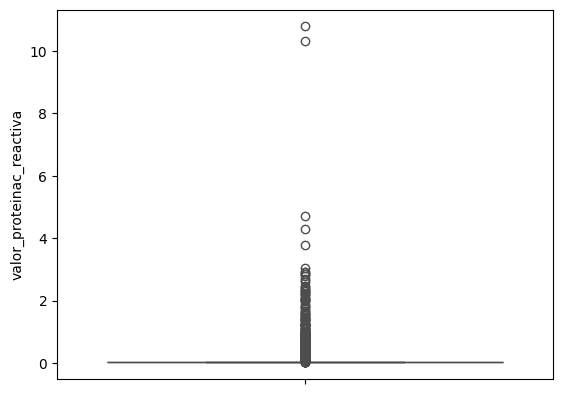

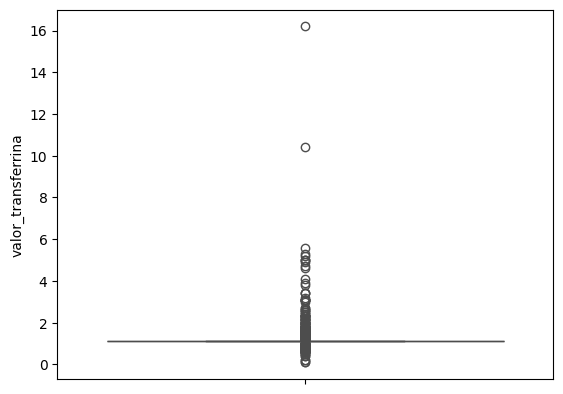

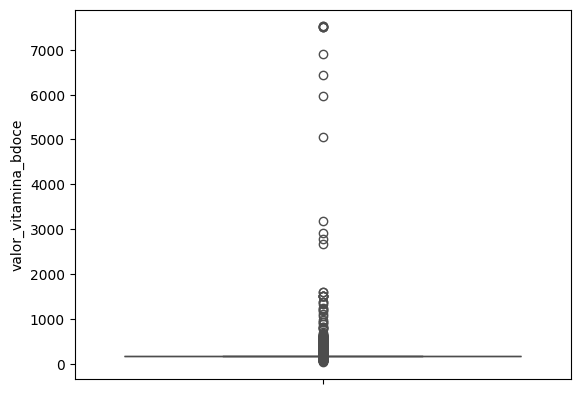

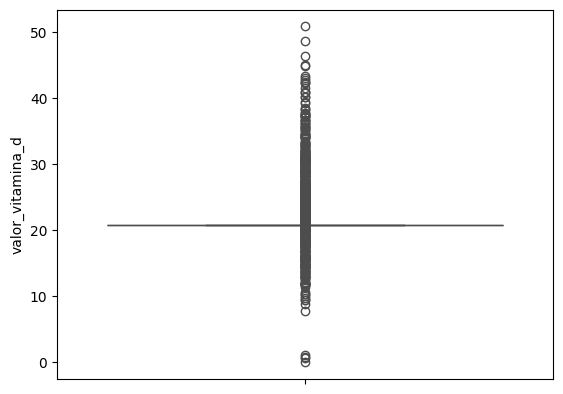

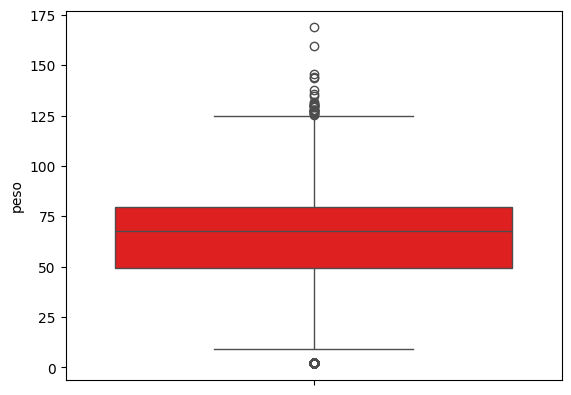

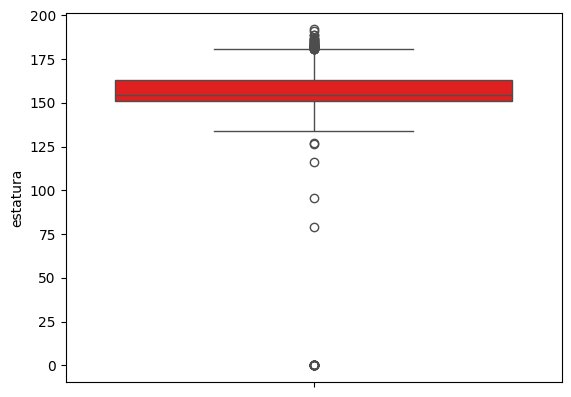

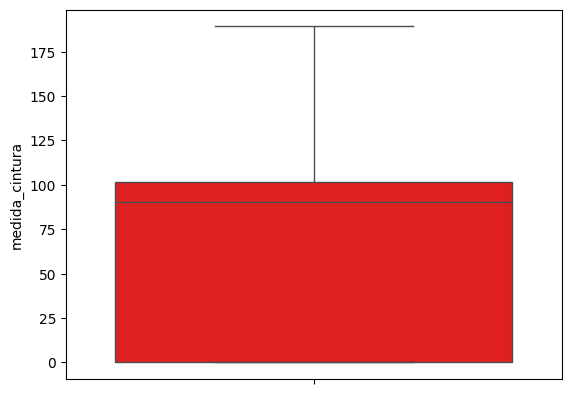

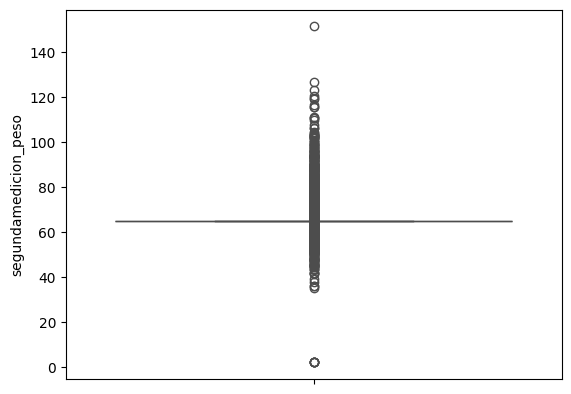

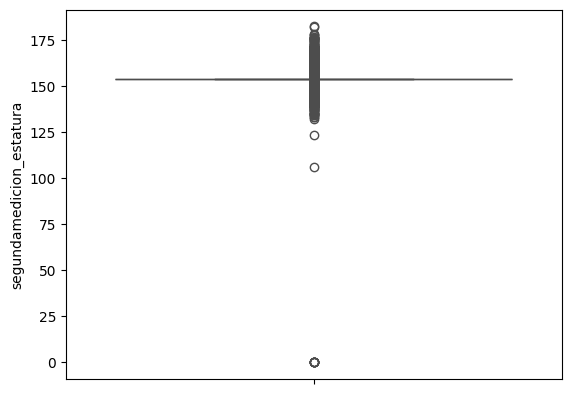

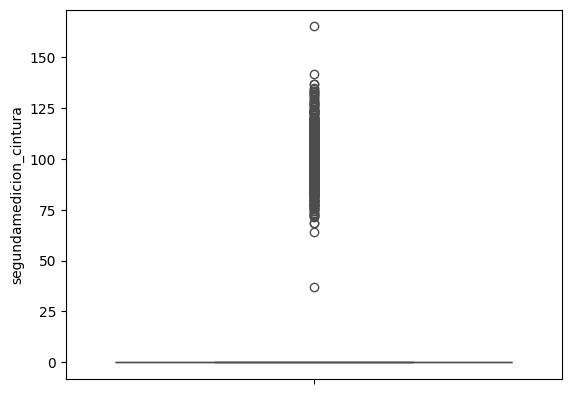

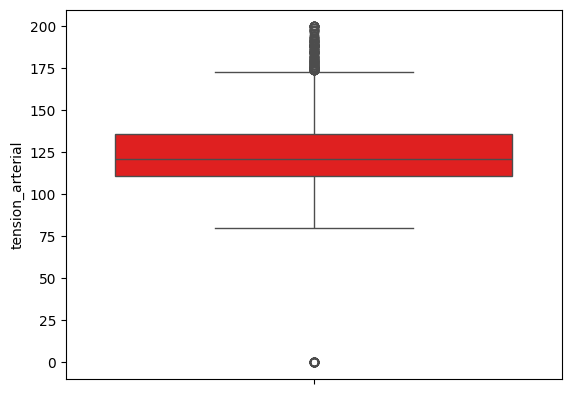

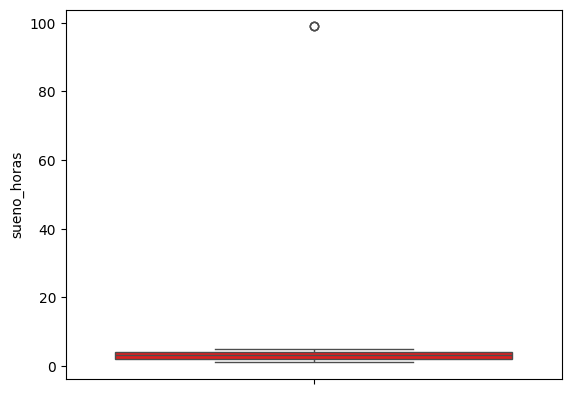

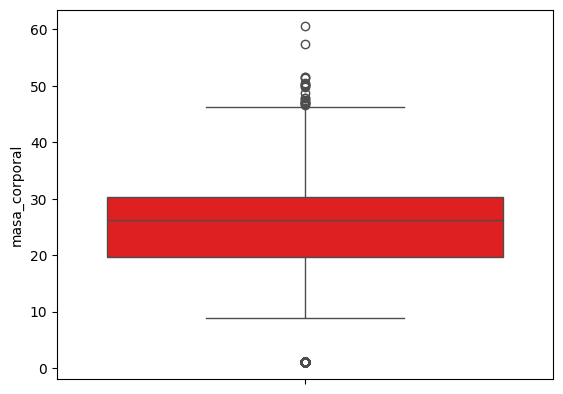

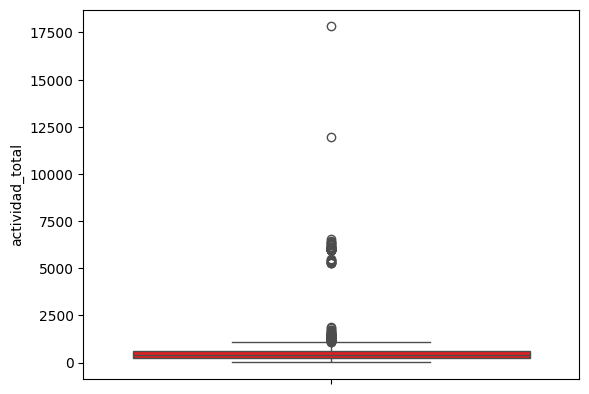

In [ ]:
for i in df.columns:
  if i not in ["FOLIO_I","sexo","riesgo_hipertension","diabetes","diabetes_no_controlada","sindrome_metabolico","entidad","estado","sur","centro","norte"]:
    sns.boxplot(df[i],color="#FF0000")
    plt.show()

El Z-score modificado es una variante del Z-score diseñada para ser más robusta frente a outliers, ya que no depende de la media ni de la desviación estándar, sino de la mediana y la desviación absoluta de la mediana (MEDA). Esto lo hace menos sensible a los valores extremos.

In [ ]:
#Z-score modificado para distribuciones no gaussianas con umbral>5
def z_modificado(columna):
  valores_atipicos=[]
  meda=0
  for x in df[columna]:
    meda+=abs(x-df[columna].mean())
  meda=meda/len(df[columna])
  #print(f"meda={meda}")
  for x in df[columna]:
    criterio=abs(x-df[columna].mean())/meda
    if criterio>5:
      valores_atipicos.append(x)
  return valores_atipicos           #devuelve una lista con los valores atípicos del objeto

In [ ]:
Lista_atipicos=[]
for nombre in df.columns:
  if nombre not in ["FOLIO_I","sexo","riesgo_hipertension","diabetes","diabetes_no_controlada","sindrome_metabolico","entidad","estado","sur","centro","norte"]:
    if z_modificado(nombre)!=[]:
      Lista_atipicos.append(nombre)
for i,nombre in enumerate(Lista_atipicos):
  Lista_atipicos[i]=[nombre,z_modificado(nombre)]
#print(Lista_atipicos)
diccionario_atipicos={}
for i in Lista_atipicos:
  diccionario_atipicos[i[0]]=i[1]
#print(diccionario_atipicos)

In [ ]:
#utilizando el criterio>5
print("Número de atípicos por columna empleando criterio>5")
for i in diccionario_atipicos:
  print(i,":",len(diccionario_atipicos[i]))

Número de atípicos por columna empleando criterio>5
concentracion_hemoglobina : 218
temperatura_ambiente : 193
valor_acido_urico : 268
valor_albumina : 113
valor_colesterol_hdl : 96
valor_colesterol_ldl : 199
valor_colesterol_total : 129
valor_creatina : 81
resultado_glucosa : 140
valor_insulina : 98
valor_trigliceridos : 113
resultado_glucosa_promedio : 148
valor_hemoglobina_glucosilada : 148
valor_ferritina : 130
valor_folato : 229
valor_homocisteina : 164
valor_proteinac_reactiva : 130
valor_transferrina : 147
valor_vitamina_bdoce : 69
valor_vitamina_d : 242
estatura : 26
segundamedicion_peso : 211
segundamedicion_estatura : 286
tension_arterial : 29
sueno_horas : 3
actividad_total : 45


## **Tratamiento de datos erróneos**

### **¿En busca de errores o de metahumanos?...**

En esta sección eliminaremos aquellos datos para variables de nuestro interés que, de ser correctos, implicarían graves afectaciones para el ser humano que puedan complicar el hecho mismo de ser entrevistados o inclusive, de ser humanos.

In [ ]:
df = df[(df["peso"] > 2)]
df = df[(df["tension_arterial"] > 0)]
df.reset_index(drop=True,inplace=True)

In [ ]:
for i in df.drop(["FOLIO_I","sexo","riesgo_hipertension","diabetes","diabetes_no_controlada","sindrome_metabolico","entidad","estado","sur","centro","norte"],axis=1).columns:
  if (df[i]<=0).any() == True:
    print(i)

estatura
medida_cintura
segundamedicion_cintura


**Respecto a la meidición de cintura**

In [ ]:
#Para tratar los ceros presentes ya sea en la primera medición o en la segunda, se utilizara la medición que efectivamente contenga datos distintos de cero
indice=0
for i in df["medida_cintura"]:
  if i == 0:
    df.at[indice,"medida_cintura"]=df.loc[indice,"segundamedicion_cintura"]
  indice+=1
indice=0
for i in df["segundamedicion_cintura"]:
  if i == 0:
    df.at[indice,"segundamedicion_cintura"]=df.loc[indice,"medida_cintura"]
  indice+=1

In [ ]:
(df["medida_cintura"]-df["segundamedicion_cintura"]).describe()

,0
count,3381.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [ ]:
#Lo anterior significa que o bien se cuenta con la primera medición, o se cuenta con la segunda, por lo que ahora solo tenemos una medición de cintura
df.drop("segundamedicion_cintura",axis=1,inplace=True)

In [ ]:
#Pese a que la medición de cintura es importante para nuestro estudio, borramos las mediciones no disponibles
df=df[df["medida_cintura"]!=0]

In [ ]:
df.reset_index(drop=True,inplace=True)

**Respecto a la estatura**

In [ ]:
#Para tratar los ceros presentes ya sea en la primera medición o en la segunda, se utilizara la medición que efectivamente contenga datos distintos de cero
indice=0
for i in df["estatura"]:
  if i == 0:
    df.at[indice,"estatura"]=df.loc[indice,"segundamedicion_estatura"]
  indice+=1
indice=0
for i in df["segundamedicion_estatura"]:
  if i == 0:
    df.at[indice,"segundamedicion_estatura"]=df.loc[indice,"estatura"]
  indice+=1

In [ ]:
(df["estatura"]-df["segundamedicion_estatura"]).describe()

,0
count,3027.000000
mean,4.771391
std,9.402622
min,-37.700000
25%,-2.100000
50%,4.000000
75%,11.450000
max,38.000000


<Axes: ylabel='Count'>

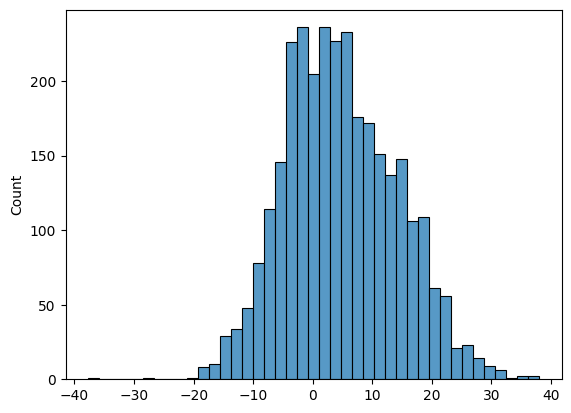

In [ ]:
sns.histplot(df["estatura"]-df["segundamedicion_estatura"])

**Respecto al peso**

In [ ]:
df[["peso","segundamedicion_peso"]].describe()

,peso,segundamedicion_peso
count,3027.000000,3.027000e+03
mean,75.061160,6.470000e+01
std,16.030742,2.473097e-12
min,32.050000,6.470000e+01
25%,64.100000,6.470000e+01
50%,73.200000,6.470000e+01
75%,84.175000,6.470000e+01
max,168.800000,6.470000e+01


In [ ]:
#Note que segundamedicion_peso es cte.
df.drop("segundamedicion_peso",axis=1,inplace=True)

<Axes: xlabel='peso', ylabel='Count'>

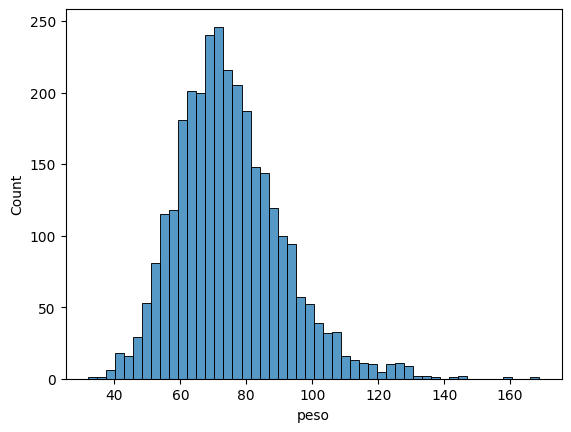

In [ ]:
sns.histplot(df["peso"])

In [ ]:
df["imc"] = (
    (df["peso"]) /
    (((0.5 * df["estatura"] + 0.5 * df["segundamedicion_estatura"])*1/100) ** 2)
)

<Axes: xlabel='imc', ylabel='Count'>

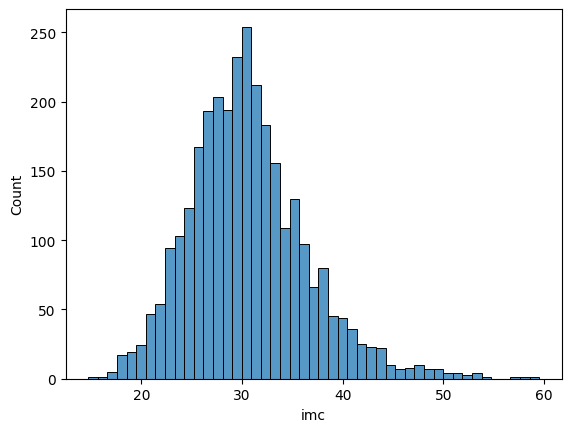

In [ ]:
sns.histplot(df["imc"])

<Axes: ylabel='Count'>

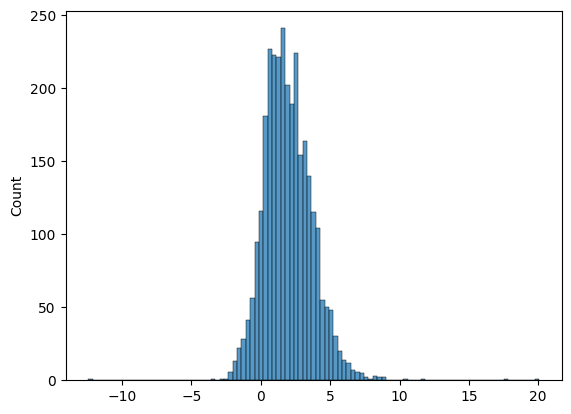

In [ ]:
sns.histplot(df["imc"]-df["masa_corporal"])

<Axes: xlabel='masa_corporal', ylabel='Count'>

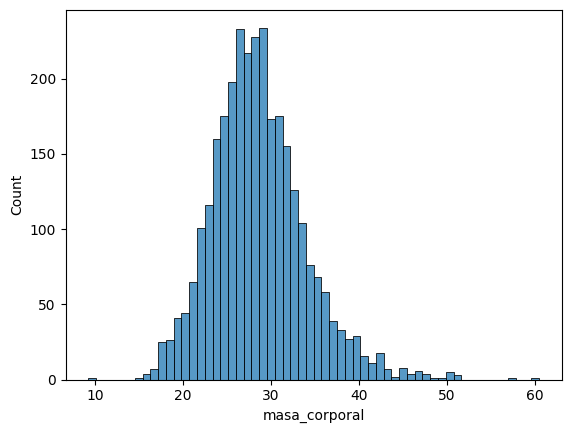

In [ ]:
sns.histplot(df["masa_corporal"])

In [ ]:
df.reset_index(drop=True,inplace=True)

**Respecto a las horas de sueño**

In [ ]:
z_modificado("sueno_horas")

[99, 99]

In [ ]:
df[df["sueno_horas"]!=99]["sueno_horas"].mode()

,sueno_horas
0,4


In [ ]:
indice=0
for i in df["sueno_horas"]:
  if i == 99:
    df.at[indice,"sueno_horas"]=4
  indice+=1

In [ ]:

df.reset_index(drop=True,inplace=True)

### **Dependencia**

Utilizando el Coeficiente de correlación de Spearman

In [ ]:
def mapa_calor(df):
  corr_matrix =df.drop("FOLIO_I",axis=1).corr(method='spearman')

  # Crear el mapa de calor
  plt.figure(figsize=(9, 7))  # Tamaño de la figura
  sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
  plt.title("Mapa de calor de la matriz de correlación")
  plt.show()

In [ ]:
def correlaciones(df):
  for j in df.drop("FOLIO_I",axis=1).columns:
    variable_a_comparar = j
    correlacion = []
    for i in df.drop("FOLIO_I",axis=1).columns:
      if i != variable_a_comparar:
        k = df[i].corr(df[variable_a_comparar],method='spearman')
        if abs(k) >= 0.76:
          correlacion.append(i)
    if correlacion!=[]:
      print(f"{variable_a_comparar} altamente correlacionado con: {correlacion}" )
      print("")

**Partición entre hombres y mujeres**

Dado que los rangos adecuados de mediciones tales como la concentración de hemoglobina o el nivel de colesterol hdl son diferentes para ambos sexos y, teniendo en cuenta que las mujeres conforman más del 60% de los datos, se decide particionar la muestra haciendo distinción entre hombres y mujeres.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   FOLIO_I                        3027 non-null   object 
 1   sexo                           3027 non-null   int64  
 2   edad                           3027 non-null   int64  
 3   concentracion_hemoglobina      3027 non-null   float64
 4   temperatura_ambiente           3027 non-null   int64  
 5   valor_acido_urico              3027 non-null   float64
 6   valor_albumina                 3027 non-null   float64
 7   valor_colesterol_hdl           3027 non-null   int64  
 8   valor_colesterol_ldl           3027 non-null   float64
 9   valor_colesterol_total         3027 non-null   int64  
 10  valor_creatina                 3027 non-null   float64
 11  resultado_glucosa              3027 non-null   float64
 12  valor_insulina                 3027 non-null   f

In [ ]:
df.drop(["entidad","estado"],axis=1,inplace=True)

In [ ]:
df_H=df[df["sexo"]==1].copy()
df_H.drop("sexo",axis=1,inplace=True)
df_H.reset_index(drop=True,inplace=True)
df_M=df[df["sexo"]==2].copy()
df_M.drop("sexo",axis=1,inplace=True)
df_M.reset_index(drop=True,inplace=True)

In [ ]:
columnas_constantes = df_H.columns[df_H.nunique() == 1]
columnas_constantes_H=columnas_constantes.tolist()
# Mostrar columnas constantes
print("Columnas constantes:", columnas_constantes_H)

Columnas constantes: ['valor_ferritina', 'valor_folato', 'valor_homocisteina', 'valor_proteinac_reactiva', 'valor_transferrina', 'valor_vitamina_bdoce', 'valor_vitamina_d', 'segundamedicion_estatura']


In [ ]:
df_H["valor_folato"].describe()

,valor_folato
count,1.199000e+03
mean,2.340000e+01
std,4.584913e-13
min,2.340000e+01
25%,2.340000e+01
50%,2.340000e+01
75%,2.340000e+01
max,2.340000e+01


In [ ]:
def identificar_varianza_baja(df1, umbral=0.01):
    """
    Función para identificar columnas con varianza baja en relación al rango de la columna.
    :param umbral: porcentaje del rango a partir del cual se considera baja la varianza (default: 0.01 o 1%)
    :return: Lista de nombres de columnas con varianza baja
    """
    df=df1.drop("FOLIO_I",axis=1).copy()
    varianzas = df.var()  # Calcula la varianza de cada columna
    rangos = df.max() - df.min()  # Calcula el rango (máximo - mínimo) de cada columna

    columnas_con_varianza_baja = []  # Lista para almacenar los nombres de columnas con varianza baja

    for columna in df.columns:
        if varianzas[columna] <= umbral * rangos[columna] or rangos[columna]==0:  # Compara la varianza con el umbral del rango
            columnas_con_varianza_baja.append(columna)

    return columnas_con_varianza_baja

identificar_varianza_baja(df_H, umbral=0.01)



['valor_creatina',
 'valor_ferritina',
 'valor_folato',
 'valor_homocisteina',
 'valor_proteinac_reactiva',
 'valor_transferrina',
 'valor_vitamina_bdoce',
 'valor_vitamina_d',
 'segundamedicion_estatura']

In [ ]:
identificar_varianza_baja(df_M, umbral=0.01)

['valor_creatina', 'segundamedicion_estatura']

In [ ]:
df_M.drop(identificar_varianza_baja(df_H, umbral=0.01),axis=1,inplace=True)
df_H.drop(identificar_varianza_baja(df_H, umbral=0.01),axis=1,inplace=True)


In [ ]:
correlaciones(df_H)

valor_colesterol_ldl altamente correlacionado con: ['valor_colesterol_total']

valor_colesterol_total altamente correlacionado con: ['valor_colesterol_ldl']

resultado_glucosa_promedio altamente correlacionado con: ['valor_hemoglobina_glucosilada']

valor_hemoglobina_glucosilada altamente correlacionado con: ['resultado_glucosa_promedio']

peso altamente correlacionado con: ['medida_cintura', 'masa_corporal', 'imc']

medida_cintura altamente correlacionado con: ['peso', 'masa_corporal', 'imc']

masa_corporal altamente correlacionado con: ['peso', 'medida_cintura', 'imc']

centro altamente correlacionado con: ['norte']

norte altamente correlacionado con: ['centro']

imc altamente correlacionado con: ['peso', 'medida_cintura', 'masa_corporal']



In [ ]:
correlaciones(df_M)

valor_colesterol_ldl altamente correlacionado con: ['valor_colesterol_total']

valor_colesterol_total altamente correlacionado con: ['valor_colesterol_ldl']

resultado_glucosa_promedio altamente correlacionado con: ['valor_hemoglobina_glucosilada']

valor_hemoglobina_glucosilada altamente correlacionado con: ['resultado_glucosa_promedio']

peso altamente correlacionado con: ['medida_cintura', 'masa_corporal', 'imc']

medida_cintura altamente correlacionado con: ['peso', 'masa_corporal', 'imc']

masa_corporal altamente correlacionado con: ['peso', 'medida_cintura', 'imc']

diabetes altamente correlacionado con: ['diabetes_no_controlada']

diabetes_no_controlada altamente correlacionado con: ['diabetes']

imc altamente correlacionado con: ['peso', 'medida_cintura', 'masa_corporal']



Para que la inversa de la matriz de varianza exista, esta debe ser de rango completo, es decir, que no tenga columnas linealmente dependientes de otras, por lo que se debe proceder con cautela al seleccionar variables altamente correlacionadas a pares.


In [ ]:
def Mahalanobis_Robusta(df):
  df_filtrado=df.drop("FOLIO_I",axis=1).copy()
  df_array=df_filtrado.to_numpy()
  #matriz de covarianza con el determinante más pequeño
  mcd=MinCovDet(random_state=8).fit(df_array)
  #estimación del centroide sin outliers
  mcd.location_
  #estimador de la matriz de covarianza sin outliers por mcd
  covarianza_mcd=mcd.covariance_
  inv_covarianza_mcd=np.linalg.inv(covarianza_mcd)
  distancias=[]
  for i in df_array:
    dist=mahalanobis(i,mcd.location_,inv_covarianza_mcd)
    distancias.append(dist)
  #p-valor
  gradoslibertad = df_filtrado.shape[1]
  p=1-chi2.cdf(distancias,gradoslibertad)
  outliers=p<0.05
  indices_outliers=np.where(outliers)[0]
  individuos=df.iloc[indices_outliers]

  return individuos, indices_outliers

**Eliminando valores atípicos para la población masculina**

In [ ]:
Mahalanobis_Robusta(df_H[["FOLIO_I",'peso',"medida_cintura","estatura"]])
a, b = Mahalanobis_Robusta(df_H[["FOLIO_I",'peso',"medida_cintura","estatura"]])

df_H.drop(df_H.index[b],inplace=True)  # Usamos df.index para garantizar que los índices son correctos
df_H.reset_index(drop=True, inplace=True)
for i in a['FOLIO_I']:
  df=df[df["FOLIO_I"]!=i]
df.reset_index(drop=True, inplace=True)
a

,FOLIO_I,peso,medida_cintura,estatura
271,2022_08019067,117.05,183.2,183.2
314,2022_09005027,75.40,162.6,162.4
762,2022_19031104,124.70,189.3,170.8
842,2022_20339014,87.80,116.3,116.3
846,2022_20499002,71.20,168.0,168.0
987,2022_26030029,98.80,179.9,179.9
992,2022_26030121,89.10,174.3,174.3


In [ ]:
a, b = Mahalanobis_Robusta(df_H[["FOLIO_I", 'peso', "medida_cintura", "imc"]])

df_H.drop(df_H.index[b],inplace=True)  # Usamos df.index para garantizar que los índices son correctos
df_H.reset_index(drop=True, inplace=True)
for i in a['FOLIO_I']:
  df=df[df["FOLIO_I"]!=i]
df.reset_index(drop=True, inplace=True)
a

,FOLIO_I,peso,medida_cintura,imc
44,2022_02003004,168.8,147.2,56.694707


In [ ]:
a, b = Mahalanobis_Robusta(df_H[["FOLIO_I","tension_arterial","riesgo_hipertension"]])

df_H.drop(df_H.index[b],inplace=True)  # Usamos df.index para garantizar que los índices son correctos
df_H.reset_index(drop=True, inplace=True)
for i in a['FOLIO_I']:
  df=df[df["FOLIO_I"]!=i]
df.reset_index(drop=True, inplace=True)
a

,FOLIO_I,tension_arterial,riesgo_hipertension
40,2022_02002149,193,0
305,2022_08064001,200,0


**Eliminando valores atípicos para la población femenina**

In [ ]:
a, b = Mahalanobis_Robusta(df_M[["FOLIO_I",'peso',"medida_cintura","estatura"]])

df_M.drop(df_M.index[b],inplace=True)  # Usamos df.index para garantizar que los índices son correctos
df_M.reset_index(drop=True, inplace=True)
for i in a['FOLIO_I']:
  df=df[df["FOLIO_I"]!=i]
df.reset_index(drop=True, inplace=True)
a

,FOLIO_I,peso,medida_cintura,estatura
409,2022_08037175,72.40,152.1,152.1
928,2022_16019001,58.70,147.0,147.0
1100,2022_19018029,80.25,157.8,157.8
1169,2022_19031077,74.55,158.0,158.0
1219,2022_19046008,95.40,164.0,164.0
1784,2022_31101015,77.05,149.8,149.8


In [ ]:
a, b = Mahalanobis_Robusta(df_M[["FOLIO_I", 'peso', "medida_cintura", "imc"]])

df_M.drop(df_M.index[b],inplace=True)  # Usamos df.index para garantizar que los índices son correctos
df_M.reset_index(drop=True, inplace=True)
for i in a['FOLIO_I']:
  df=df[df["FOLIO_I"]!=i]
df.reset_index(drop=True, inplace=True)
a

,FOLIO_I,peso,medida_cintura,imc
1518,2022_26042021,126.0,125.9,42.839293


In [ ]:
a, b = Mahalanobis_Robusta(df_M[["FOLIO_I","tension_arterial","riesgo_hipertension"]])

df_M.drop(df_M.index[b],inplace=True)  # Usamos df.index para garantizar que los índices son correctos
df_M.reset_index(drop=True, inplace=True)
for i in a['FOLIO_I']:
  df=df[df["FOLIO_I"]!=i]
df.reset_index(drop=True, inplace=True)
a

,FOLIO_I,tension_arterial,riesgo_hipertension
23,2022_01002021,191,0
107,2022_03008060,179,0
177,2022_05024007,193,1
209,2022_05030087,200,1
643,2022_12001126,197,1
1426,2022_24037025,177,0
1517,2022_26042010,200,1
1523,2022_26047007,200,1
1708,2022_30159025,188,0
1797,2022_32024009,200,1


In [ ]:
a, b = Mahalanobis_Robusta(df_M[["FOLIO_I",'peso',"medida_cintura","masa_corporal"]])
df_M.drop(df_M.index[b],inplace=True)  # Usamos df.index para garantizar que los índices son correctos
df_M.reset_index(drop=True, inplace=True)
for i in a['FOLIO_I']:
  df=df[df["FOLIO_I"]!=i]
df.reset_index(drop=True, inplace=True)
a

,FOLIO_I,peso,medida_cintura,masa_corporal
227,2022_06002027,90.0,108.8,17.886623


In [ ]:
a, b = Mahalanobis_Robusta(df_M[["FOLIO_I",'peso',"medida_cintura"]])
df_M.drop(df_M.index[b],inplace=True)  # Usamos df.index para garantizar que los índices son correctos
df_M.reset_index(drop=True, inplace=True)
for i in a['FOLIO_I']:
  df=df[df["FOLIO_I"]!=i]
df.reset_index(drop=True, inplace=True)
a

,FOLIO_I,peso,medida_cintura
919,2022_16015028,83.1,147.3


**Eliminando aquellos datos donde la medición de cintura es la misma para la estatura**

In [ ]:
df = df[(df["medida_cintura"]/df["estatura"]) != 1]
df_H=df_H[(df_H["medida_cintura"]/df_H["estatura"])!=1]
df_M=df_M[(df_M["medida_cintura"]/df_M["estatura"])!=1]

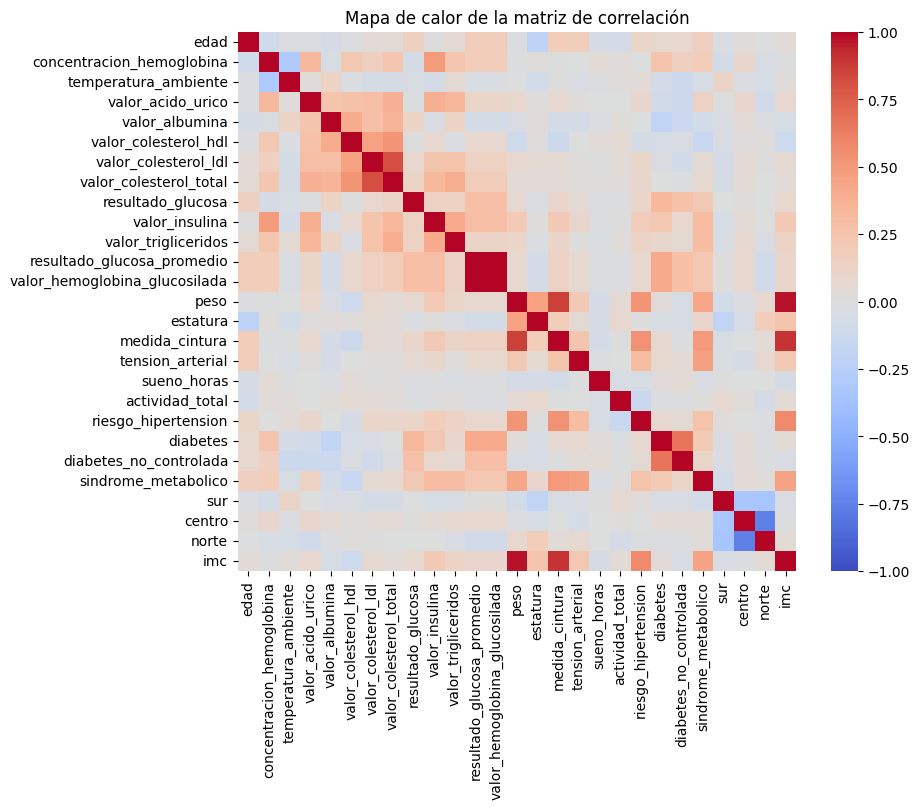

In [ ]:
mapa_calor(df_H.drop("masa_corporal",axis=1))

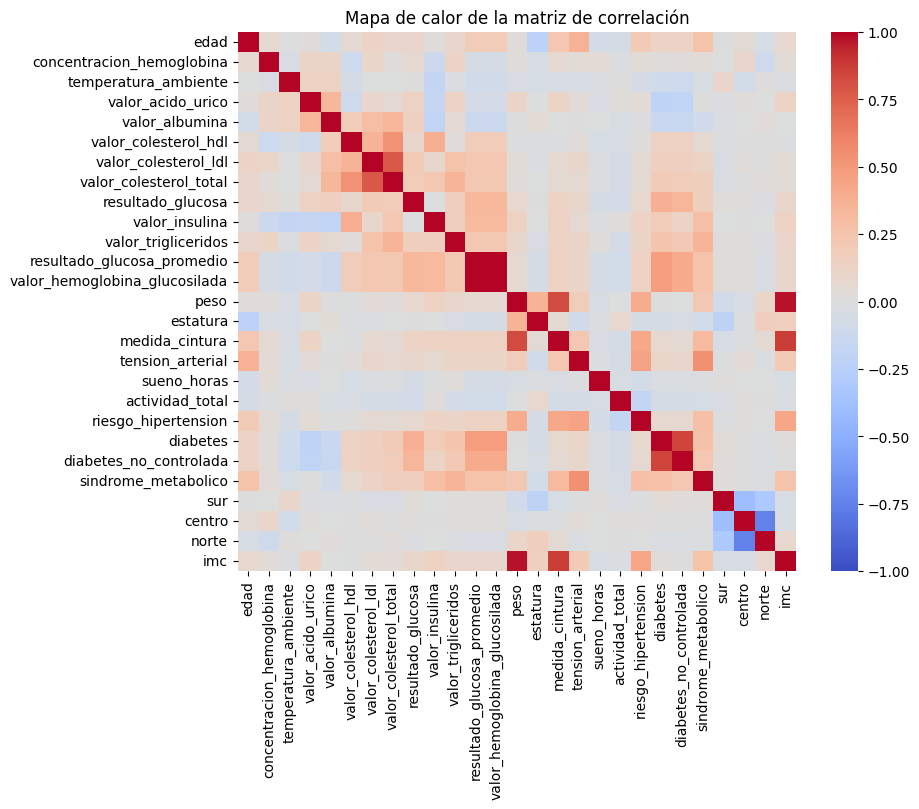

In [ ]:
mapa_calor(df_M.drop("masa_corporal",axis=1))

In [ ]:
df.loc[df["sexo"] == 2, "sexo"] = 0

In [ ]:
def MRL(datos, variable_objetivo, predictoras):
    X = datos[predictoras]
    y = datos[variable_objetivo]

    # Agregar una constante (intercepto) a las variables predictoras para el modelo OLS
    X = sm.add_constant(X)

    # Crear un modelo de regresión lineal usando statsmodels
    modelo = sm.OLS(y, X).fit()

    # Obtener los residuos
    residuos = modelo.resid

    # Histograma de los residuos
    plt.figure(figsize=(8, 5))
    plt.hist(residuos, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
    plt.xlabel('Residuos')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de Residuos')
    plt.show()

    # Visualización de la regresión
    plt.figure(figsize=(6, 4))
    plt.scatter(y, modelo.fittedvalues, color='blue', alpha=0.6)
    plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
    plt.title('Ajuste del modelo de regresión lineal')
    plt.xlabel('Valores reales')
    plt.ylabel('Valores predichos')
    plt.show()

    #mapa de calor
    matriz_correlacion =datos[predictoras].corr(method='spearman')
    plt.figure(figsize=(7, 5))  # Tamaño de la figura
    sns.heatmap(matriz_correlacion, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Mapa de calor de la matriz de correlación")
    plt.show()

    # Esperanza de los errores
    esperanza_errores = residuos.mean()
    print("")
    print(f"La esperanza de los errores es: {esperanza_errores:.2f}")

    # Realizar la prueba de Breusch-Pagan para heterocedasticidad
    lm, lm_pvalue, fvalue, f_pvalue = sms.het_breuschpagan(residuos, modelo.model.exog)
    print("")
    print("Prueba de Breusch-Pagan para heterocedasticidad")
    print(f"Estadístico LM: {lm:.4f}")
    print(f"P-valor LM: {lm_pvalue:.4f}")
    print(f"Estadístico F: {fvalue:.4f}")
    print(f"P-valor F: {f_pvalue:.4f}")
     # Si el p-valor LM es menor que 0.05, se rechaza la hipótesis nula de homocedasticidad
    if (lm_pvalue < 0.05) or (f_pvalue < 0.05):
      print("Hay evidencia de heterocedasticidad (p-value < 0.05 en al menos una prueba).")
    else:
      print("No hay evidencia de heterocedasticidad (p-value >= 0.05 en ambas pruebas).")

    #Indice de Condición
    #Se estandarizan las variables
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(datos[predictoras])

    # Calcular la matriz X^T X
    XTX = np.dot(X_scaled.T, X_scaled)

    # Obtener los valores propios de X^T X
    eigenvalues = np.linalg.eigvals(XTX)

    # Calcular el índice de condición
    condition_index = np.sqrt(max(eigenvalues) / min(eigenvalues))
    print("")
    print(f"Índice de Condición (X^T X): {condition_index}")

    #Los factores de inflación de la varianza (VIF)
    x_temp = X
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
    vif["Variable"] = x_temp.columns
    print(vif.round(1))

    #Resumen del modelo
    print("")
    print((modelo).summary())

    return modelo, residuos

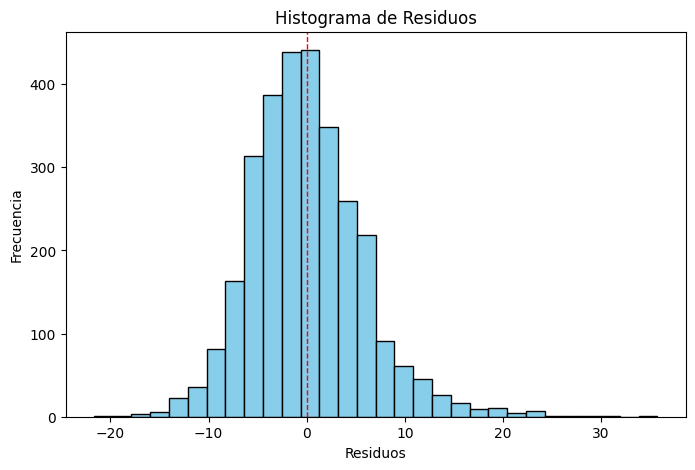

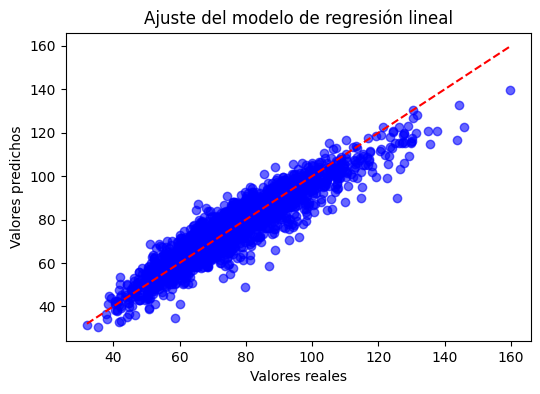

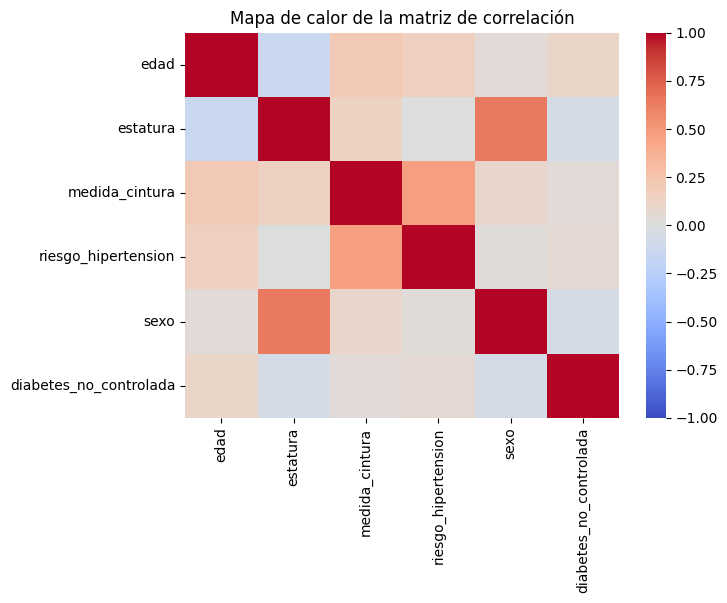


La esperanza de los errores es: -0.00

Prueba de Breusch-Pagan para heterocedasticidad
Estadístico LM: 76.9160
P-valor LM: 0.0000
Estadístico F: 13.1263
P-valor F: 0.0000
Hay evidencia de heterocedasticidad (p-value < 0.05 en al menos una prueba).

Índice de Condición (X^T X): 2.2996828920900723
   VIF Factor                Variable
0       541.9                   const
1         1.1                    edad
2         1.8                estatura
3         1.4          medida_cintura
4         1.3     riesgo_hipertension
5         1.7                    sexo
6         1.0  diabetes_no_controlada

Prueba de Breusch-Godfrey para autocorrelación:
Estadístico LM: 9.8032, p-valor (LM): 0.0203
Estadístico F: 3.2675, p-valor (F): 0.0205
Hay evidencia de autocorrelación.

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:             

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x780e727ec670>,
 0       -4.140272
 1        5.458146
 2       -7.030637
 3       -0.398598
 4        5.946720
           ...    
 2993    -5.380819
 2994    10.681586
 2995    -3.952085
 2996    -5.691625
 2997    -4.866074
 Length: 2997, dtype: float64)

In [ ]:
MRL(df,"peso",['edad','estatura', 'medida_cintura','riesgo_hipertension',"sexo","diabetes_no_controlada"])

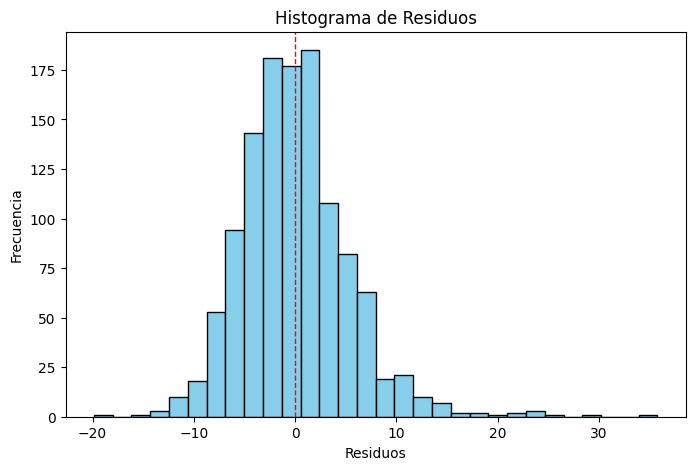

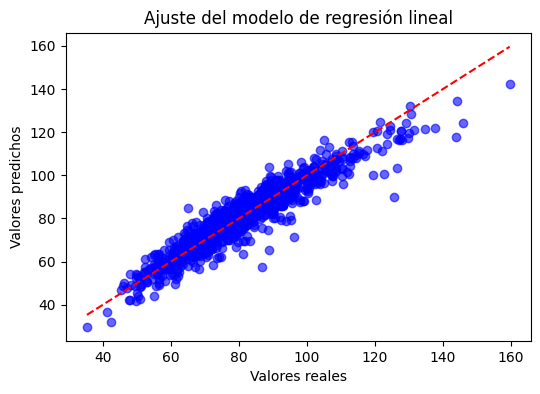

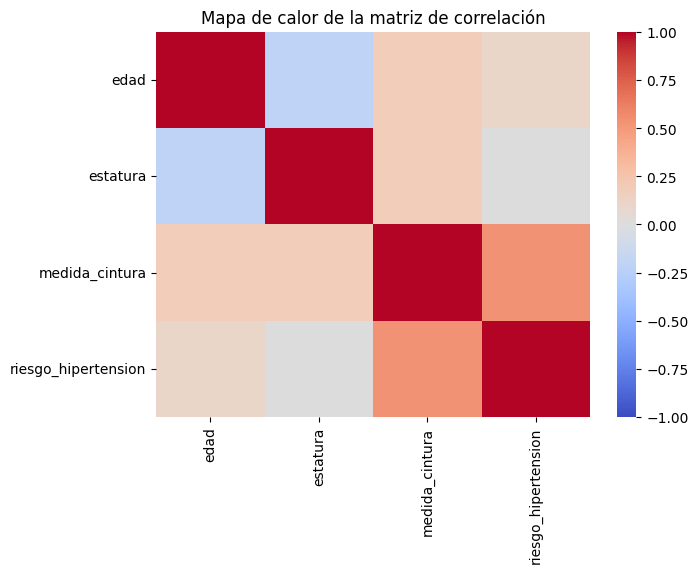


La esperanza de los errores es: -0.00

Prueba de Breusch-Pagan para heterocedasticidad
Estadístico LM: 24.5598
P-valor LM: 0.0001
Estadístico F: 6.2431
P-valor F: 0.0001
Hay evidencia de heterocedasticidad (p-value < 0.05 en al menos una prueba).

Índice de Condición (X^T X): 1.9487008610195897
   VIF Factor             Variable
0       540.2                const
1         1.1                 edad
2         1.1             estatura
3         1.5       medida_cintura
4         1.4  riesgo_hipertension

Prueba de Breusch-Godfrey para autocorrelación:
Estadístico LM: 3.8366, p-valor (LM): 0.2797
Estadístico F: 1.2744, p-valor (F): 0.2817
No hay evidencia de autocorrelación.

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     2371.
Da

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x780e72313fa0>,
 0       -4.049195
 1       -0.158902
 2       13.711569
 3       -6.019284
 4       -2.473634
           ...    
 1184    -0.485552
 1185    -5.945386
 1186     0.414295
 1187    10.690530
 1188    -4.501813
 Length: 1189, dtype: float64)

In [ ]:
MRL(df_H,"peso",['edad', 'estatura', 'medida_cintura', 'riesgo_hipertension'])

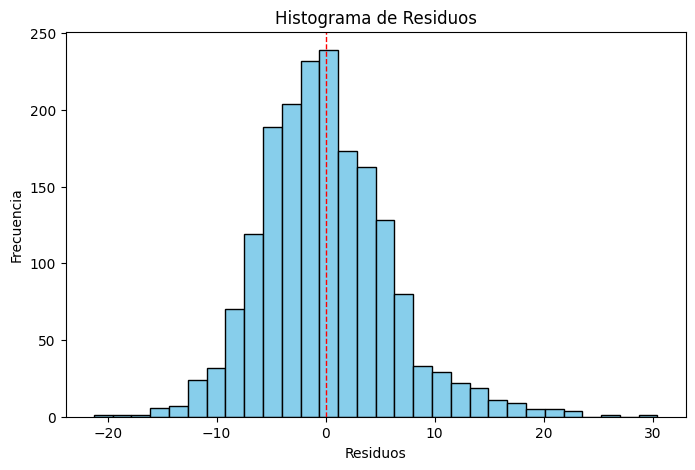

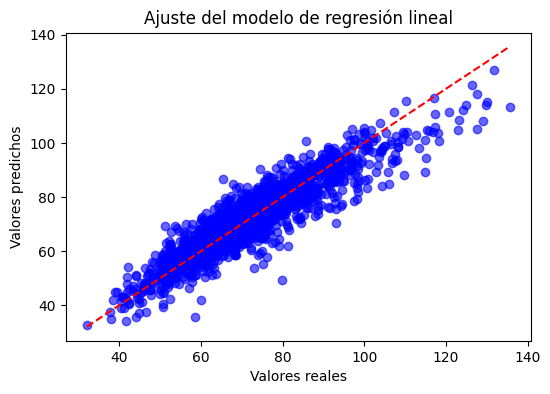

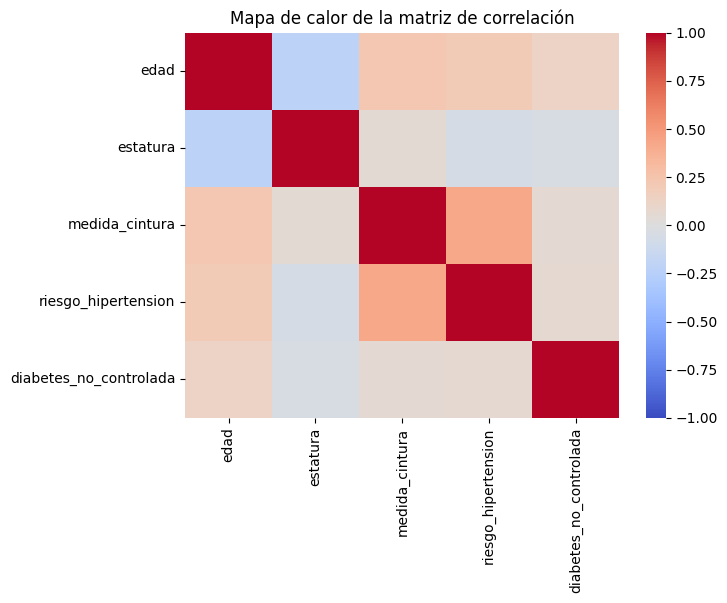


La esperanza de los errores es: -0.00

Prueba de Breusch-Pagan para heterocedasticidad
Estadístico LM: 47.6698
P-valor LM: 0.0000
Estadístico F: 9.7597
P-valor F: 0.0000
Hay evidencia de heterocedasticidad (p-value < 0.05 en al menos una prueba).

Índice de Condición (X^T X): 1.7189477079834332
   VIF Factor                Variable
0       604.9                   const
1         1.1                    edad
2         1.1                estatura
3         1.3          medida_cintura
4         1.2     riesgo_hipertension
5         1.0  diabetes_no_controlada

Prueba de Breusch-Godfrey para autocorrelación:
Estadístico LM: 7.8354, p-valor (LM): 0.0495
Estadístico F: 2.6101, p-valor (F): 0.0500
Hay evidencia de autocorrelación.

                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Leas

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x780e72310a60>,
 0       6.151575
 1      -7.007594
 2       6.642334
 3       0.988198
 4       2.593317
           ...   
 1804    4.970828
 1805    4.258245
 1806   -5.267452
 1807   -3.693809
 1808   -5.317301
 Length: 1808, dtype: float64)

In [ ]:
MRL(df_M,"peso",['edad','estatura', 'medida_cintura', 'riesgo_hipertension',"diabetes_no_controlada"])

In [ ]:
def MRL2(datos, variable_objetivo, predictoras):
    X = datos[predictoras]
    y = datos[variable_objetivo]
    y = np.sqrt(y)

    # Agregar una constante (intercepto) a las variables predictoras para el modelo OLS
    X = sm.add_constant(X)

    # Crear un modelo de regresión lineal usando statsmodels
    modelo = sm.OLS(y, X).fit()

    # Obtener los residuos
    residuos = modelo.resid

    # Histograma de los residuos
    plt.figure(figsize=(8, 5))
    plt.hist(residuos, bins=30, color='skyblue', edgecolor='black')
    plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
    plt.xlabel('Residuos')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de Residuos')
    plt.show()

    # Visualización de la regresión
    plt.figure(figsize=(6, 4))
    plt.scatter(y, modelo.fittedvalues, color='blue', alpha=0.6)
    plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
    plt.title('Ajuste del modelo de regresión lineal')
    plt.xlabel('Valores reales')
    plt.ylabel('Valores predichos')
    plt.show()

    #mapa de calor
    matriz_correlacion =datos[predictoras].corr(method='spearman')
    plt.figure(figsize=(7, 5))  # Tamaño de la figura
    sns.heatmap(matriz_correlacion, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
    plt.title("Mapa de calor de la matriz de correlación")
    plt.show()

    # Esperanza de los errores
    esperanza_errores = residuos.mean()
    print(f"La esperanza de los errores es: {esperanza_errores:.2f}")

    # Realizar la prueba de Breusch-Pagan para heterocedasticidad
    lm, lm_pvalue, fvalue, f_pvalue = sms.het_breuschpagan(residuos, modelo.model.exog)
    print("Prueba de Breusch-Pagan para heterocedasticidad")
    print(f"Estadístico LM: {lm:.4f}")
    print(f"P-valor LM: {lm_pvalue:.4f}")
    print(f"Estadístico F: {fvalue:.4f}")
    print(f"P-valor F: {f_pvalue:.4f}")
     # Si el p-valor LM es menor que 0.05, se rechaza la hipótesis nula de homocedasticidad
    if (lm_pvalue < 0.05) or (f_pvalue < 0.05):
      print("Hay evidencia de heterocedasticidad (p-value < 0.05 en al menos una prueba).")
    else:
      print("No hay evidencia de heterocedasticidad (p-value >= 0.05 en ambas pruebas).")

    #Indice de Condición
    #Se estandarizan las variables
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(datos[predictoras])

    # Calcular la matriz X^T X
    XTX = np.dot(X_scaled.T, X_scaled)

    # Obtener los valores propios de X^T X
    eigenvalues = np.linalg.eigvals(XTX)

    # Calcular el índice de condición
    condition_index = np.sqrt(max(eigenvalues) / min(eigenvalues))

    print(f"Índice de Condición (X^T X): {condition_index}")

    #Los factores de inflación de la varianza (VIF)
    x_temp = X
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
    vif["Variable"] = x_temp.columns
    print(vif.round(1))

    #Resumen del modelo
    print((modelo).summary())

    sm.qqplot(residuos, line='45', fit=True)
    plt.title("QQ Plot de los Residuos")
    plt.show()

    return modelo, residuos

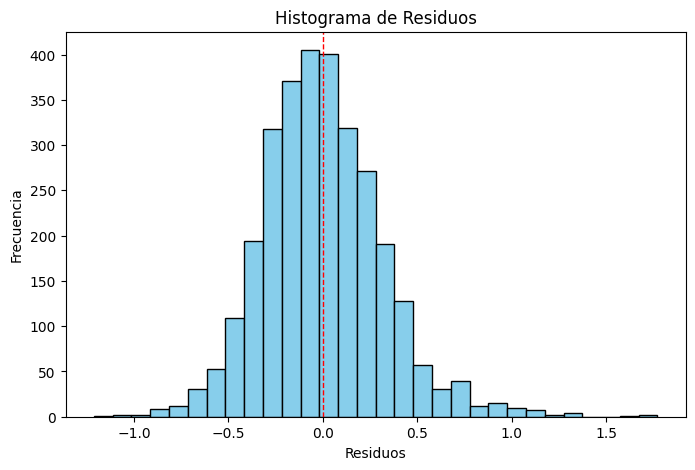

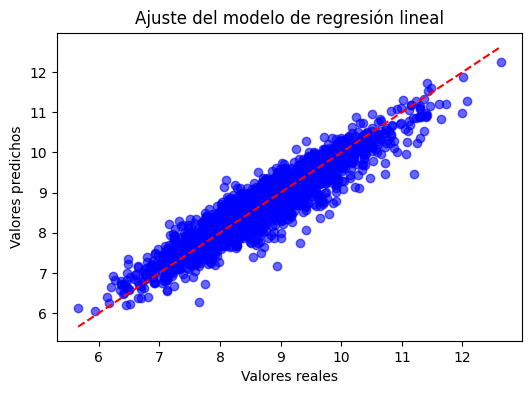

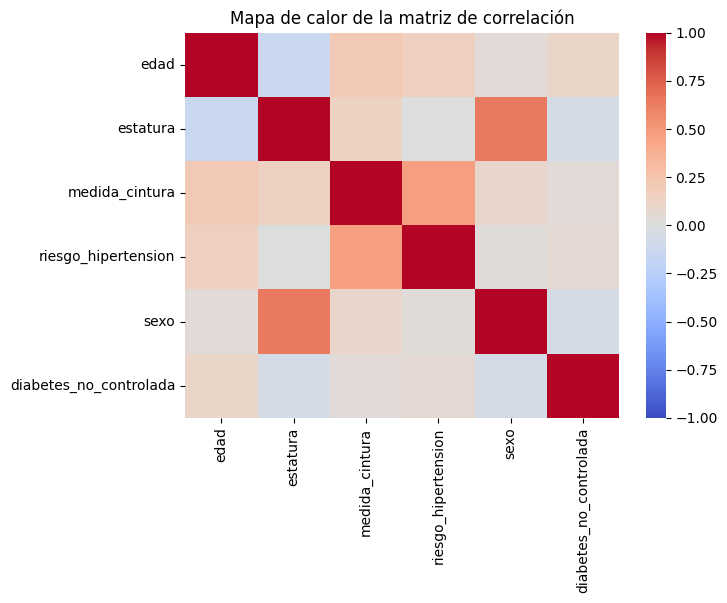

La esperanza de los errores es: -0.00
Prueba de Breusch-Pagan para heterocedasticidad
Estadístico LM: 35.4637
P-valor LM: 0.0000
Estadístico F: 5.9674
P-valor F: 0.0000
Hay evidencia de heterocedasticidad (p-value < 0.05 en al menos una prueba).
Índice de Condición (X^T X): 2.2996828920900723
   VIF Factor                Variable
0       541.9                   const
1         1.1                    edad
2         1.8                estatura
3         1.4          medida_cintura
4         1.3     riesgo_hipertension
5         1.7                    sexo
6         1.0  diabetes_no_controlada
Prueba de Breusch-Godfrey para autocorrelación:
Estadístico LM: 8.2624, p-valor (LM): 0.0040
Estadístico F: 8.2632, p-valor (F): 0.0041
Hay evidencia de autocorrelación.
                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0

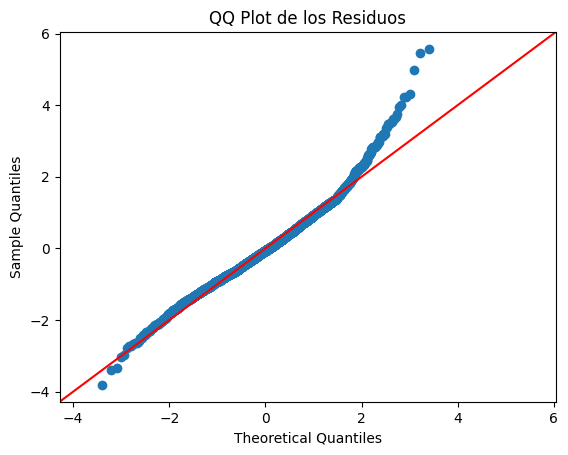

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x780e8145dc60>,
 0      -0.206799
 1       0.255770
 2      -0.417282
 3      -0.033034
 4       0.286980
           ...   
 2993   -0.285318
 2994    0.475109
 2995   -0.183912
 2996   -0.344564
 2997   -0.203087
 Length: 2997, dtype: float64)

In [ ]:
MRL2(df,"peso",['edad','estatura', 'medida_cintura','riesgo_hipertension',"sexo","diabetes_no_controlada"])

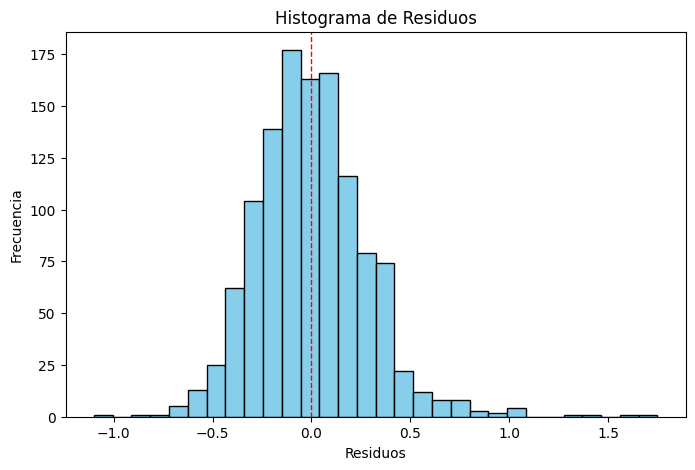

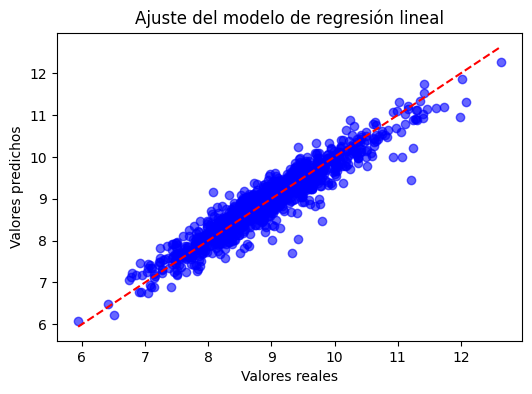

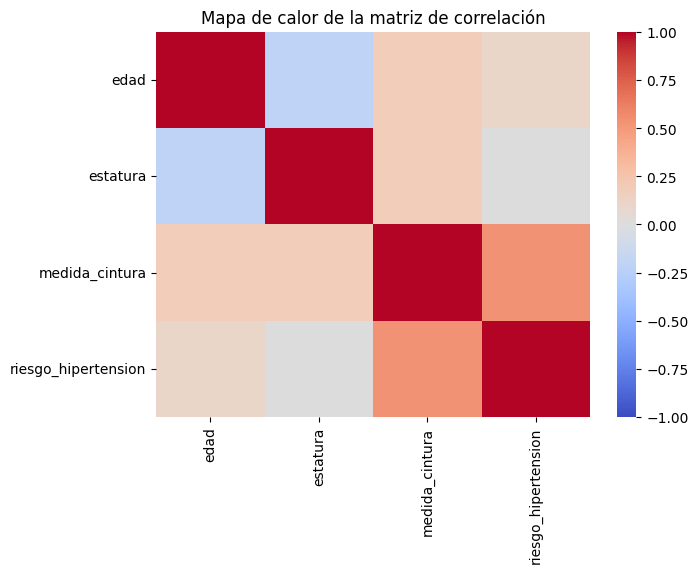

La esperanza de los errores es: -0.00
Prueba de Breusch-Pagan para heterocedasticidad
Estadístico LM: 8.6967
P-valor LM: 0.0691
Estadístico F: 2.1810
P-valor F: 0.0691
No hay evidencia de heterocedasticidad (p-value >= 0.05 en ambas pruebas).
Índice de Condición (X^T X): 1.9487008610195897
   VIF Factor             Variable
0       540.2                const
1         1.1                 edad
2         1.1             estatura
3         1.5       medida_cintura
4         1.4  riesgo_hipertension
Prueba de Breusch-Godfrey para autocorrelación:
Estadístico LM: 1.9691, p-valor (LM): 0.1605
Estadístico F: 1.9624, p-valor (F): 0.1615
No hay evidencia de autocorrelación.
                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     2617.
Date:     

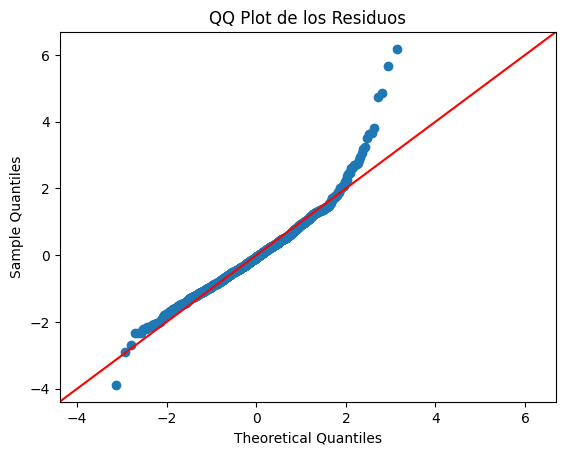

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x780e8145d0f0>,
 0      -0.198419
 1      -0.050545
 2       0.832385
 3      -0.337162
 4      -0.133748
           ...   
 1184   -0.006070
 1185   -0.285830
 1186    0.038587
 1187    0.502148
 1188   -0.308955
 Length: 1189, dtype: float64)

In [ ]:
MRL2(df_H,"peso",['edad', 'estatura', 'medida_cintura', 'riesgo_hipertension'])

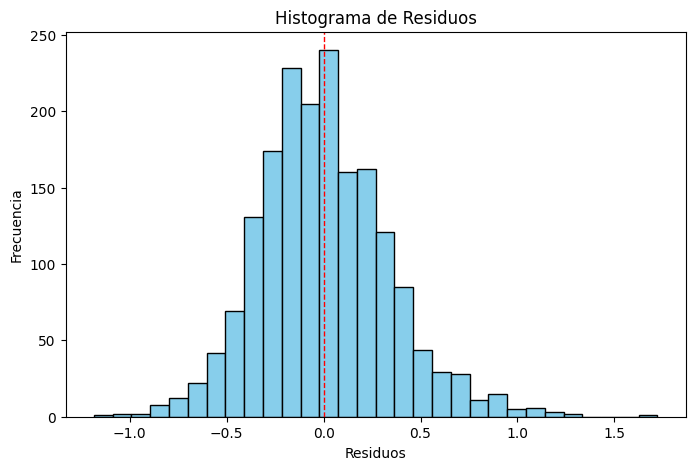

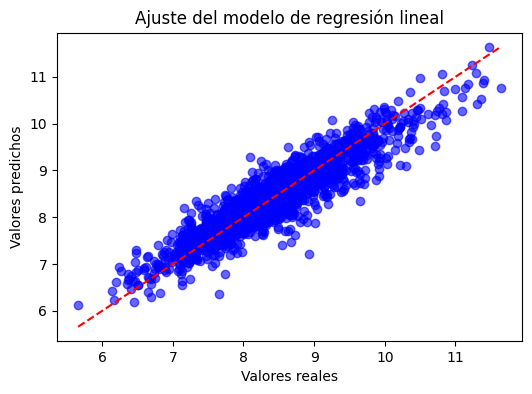

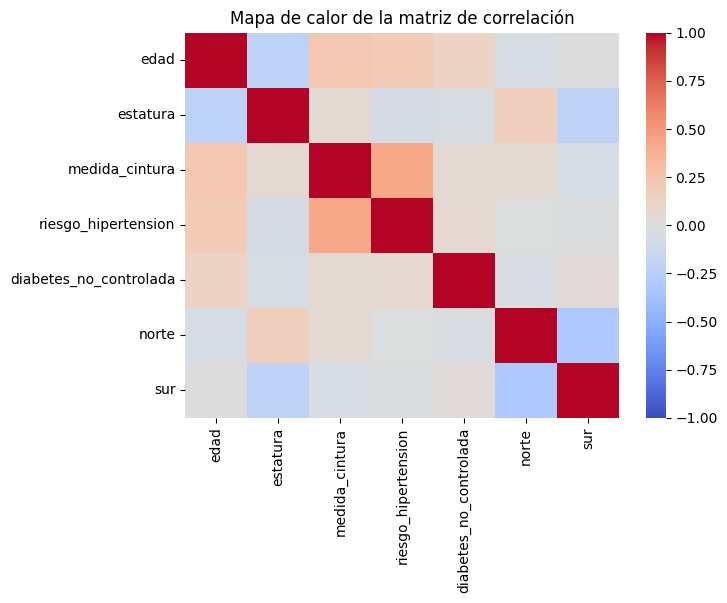

La esperanza de los errores es: -0.00
Prueba de Breusch-Pagan para heterocedasticidad
Estadístico LM: 10.7621
P-valor LM: 0.1493
Estadístico F: 1.5398
P-valor F: 0.1494
No hay evidencia de heterocedasticidad (p-value >= 0.05 en ambas pruebas).
Índice de Condición (X^T X): 1.730578585679233
   VIF Factor                Variable
0       643.4                   const
1         1.1                    edad
2         1.1                estatura
3         1.3          medida_cintura
4         1.2     riesgo_hipertension
5         1.0  diabetes_no_controlada
6         1.1                   norte
7         1.1                     sur
Prueba de Breusch-Godfrey para autocorrelación:
Estadístico LM: 8.0108, p-valor (LM): 0.0046
Estadístico F: 8.0064, p-valor (F): 0.0047
Hay evidencia de autocorrelación.
                            OLS Regression Results                            
Dep. Variable:                   peso   R-squared:                       0.845
Model:                            OLS  

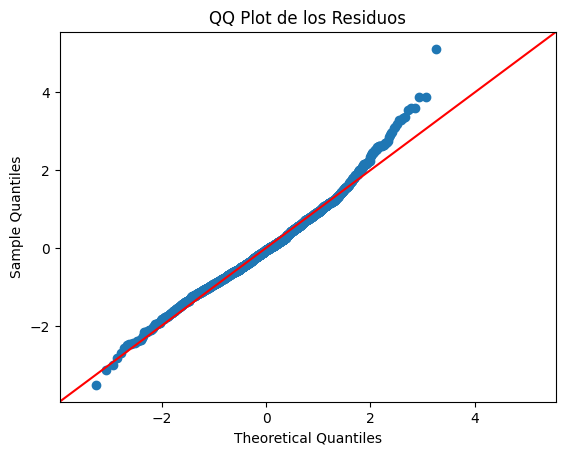

(<statsmodels.regression.linear_model.RegressionResultsWrapper at 0x780e7220e920>,
 0       0.282793
 1      -0.379237
 2       0.314114
 3       0.116430
 4       0.200058
           ...   
 1804    0.279491
 1805    0.203765
 1806   -0.289777
 1807   -0.188233
 1808   -0.255294
 Length: 1808, dtype: float64)

In [ ]:
MRL2(df_M,"peso",['edad','estatura', 'medida_cintura', 'riesgo_hipertension',"diabetes_no_controlada","norte","sur"])